### Skretas Asterios MSc part time Data Science 
## supernatural_evil_guns_assignment_2

In [1]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
from plotnine import *
import seaborn as sns
import scipy.stats.stats as stats
from sklearn.decomposition import PCA
import math
from statsmodels.formula.api import logit
%matplotlib inline

### Part 1

### Import dataset

In [2]:
df = pd.read_excel('Baylor Religion Survey, Wave IV (2014).xlsx')

In [3]:
df

,MOTHERLODE_ID,PROJECT_ID,RESPONDENT_ID,METHOD_ID,METHOD_TYPE,PROJECT_NUMBER,CREATED_ON,PRACTICE,RESPONDENT_DATE,RESPONDENT_LANGUAGE,...,STATE,PROJWT,WEIGHT,Q2,RELTRAD,I_GENDER,I_EDUC,I_MARITAL,I_RELIGION,I_ATTEND
0,128170892,33370,01_000001_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,...,TX,20086.696606,0.270000,Church of Christ,1.0,2.0,5.0,3.0,1.0,6.0
1,128170893,33370,01_000002_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,...,TX,26218.573175,0.352423,Church of God In Christ,3.0,2.0,3.0,3.0,3.0,2.0
2,128170894,33370,01_000003_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,...,ND,41408.889891,0.556608,ELCA,2.0,2.0,3.0,1.0,2.0,6.0
3,128170895,33370,01_000004_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,...,TX,50023.027356,0.672397,Independent Methodist,2.0,2.0,4.0,3.0,2.0,5.0
4,128170896,33370,01_000005_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,...,IA,230734.428388,3.101474,Don't have specific name,1.0,1.0,2.0,2.0,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,128172920,33371,02_000301_00000013,162048140_02,SCAN,162048140,3/26/2014,OTHER,3/10/2014,es-AR,...,CA,17054.912661,0.229248,NaN,4.0,2.0,5.0,2.0,4.0,2.0
1568,128172921,33371,02_000326_00000014,162048140_02,SCAN,162048140,3/26/2014,OTHER,3/12/2014,es-AR,...,CA,104454.336796,1.404049,NaN,4.0,2.0,2.0,2.0,4.0,1.0
1569,128172922,33371,02_000351_00000015,162048140_02,SCAN,162048140,3/26/2014,OTHER,3/19/2014,es-AR,...,CA,153453.642034,2.062685,NaN,6.0,2.0,3.0,1.0,5.0,6.0
1570,128172335,33371,02_000352_00000015,162048140_02,SCAN,162048140,3/26/2014,OTHER,3/19/2014,es-AR,...,CT,33324.200008,0.447935,Catolica Romana - Latinos,4.0,1.0,5.0,2.0,4.0,3.0


In order to measure the belief in supernatural evil, we will use the answers (https://www.thearda.com/Archive/Files/Codebooks/BRS2014_CB.asp), to three questions Q23A(devil),Q23C(hell),Q23G(demons) which asked by the participants in the survey:
As we see from the paper "Belief in Supernatural", these three factors devil,hell,demons can combine the metric supernatural evil. We will measure the mean of these variables as the metric of supernatural evil

In [4]:
df_evil=df.loc[:,['Q23A','Q23C','Q23G']]

In [5]:
df_evil

,Q23A,Q23C,Q23G
0,4.0,4.0,4.0
1,4.0,4.0,4.0
2,3.0,2.0,2.0
3,4.0,4.0,4.0
4,4.0,4.0,4.0
...,...,...,...
1567,4.0,2.0,4.0
1568,3.0,3.0,3.0
1569,4.0,4.0,3.0
1570,3.0,3.0,3.0


We remove NaN rows from the dataframe and we will use PCA method 

In [6]:
df_evil.dropna(inplace=True)
df_evil

,Q23A,Q23C,Q23G
0,4.0,4.0,4.0
1,4.0,4.0,4.0
2,3.0,2.0,2.0
3,4.0,4.0,4.0
4,4.0,4.0,4.0
...,...,...,...
1566,3.0,3.0,3.0
1567,4.0,2.0,4.0
1568,3.0,3.0,3.0
1569,4.0,4.0,3.0


In [7]:
df_evil['sum']=df_evil.sum(axis=1)

In [8]:
df_evil

,Q23A,Q23C,Q23G,sum
0,4.0,4.0,4.0,12.0
1,4.0,4.0,4.0,12.0
2,3.0,2.0,2.0,7.0
3,4.0,4.0,4.0,12.0
4,4.0,4.0,4.0,12.0
...,...,...,...,...
1566,3.0,3.0,3.0,9.0
1567,4.0,2.0,4.0,10.0
1568,3.0,3.0,3.0,9.0
1569,4.0,4.0,3.0,11.0


In [9]:
df_evil['mean']=df_evil['sum']/3

In [10]:
df_evil

,Q23A,Q23C,Q23G,sum,mean
0,4.0,4.0,4.0,12.0,4.000000
1,4.0,4.0,4.0,12.0,4.000000
2,3.0,2.0,2.0,7.0,2.333333
3,4.0,4.0,4.0,12.0,4.000000
4,4.0,4.0,4.0,12.0,4.000000
...,...,...,...,...,...
1566,3.0,3.0,3.0,9.0,3.000000
1567,4.0,2.0,4.0,10.0,3.333333
1568,3.0,3.0,3.0,9.0,3.000000
1569,4.0,4.0,3.0,11.0,3.666667


In [11]:
df_evil['mean'].mean()

3.0802804161013113

reset temporary data frame 

In [12]:
df_t=df.loc[:,['Q23A','Q23C','Q23G']]

In [13]:
df_t

,Q23A,Q23C,Q23G
0,4.0,4.0,4.0
1,4.0,4.0,4.0
2,3.0,2.0,2.0
3,4.0,4.0,4.0
4,4.0,4.0,4.0
...,...,...,...
1567,4.0,2.0,4.0
1568,3.0,3.0,3.0
1569,4.0,4.0,3.0
1570,3.0,3.0,3.0


In [14]:
df_t['sum']=df_t.sum(axis=1)
df_t

,Q23A,Q23C,Q23G,sum
0,4.0,4.0,4.0,12.0
1,4.0,4.0,4.0,12.0
2,3.0,2.0,2.0,7.0
3,4.0,4.0,4.0,12.0
4,4.0,4.0,4.0,12.0
...,...,...,...,...
1567,4.0,2.0,4.0,10.0
1568,3.0,3.0,3.0,9.0
1569,4.0,4.0,3.0,11.0
1570,3.0,3.0,3.0,9.0


In [15]:
df_t['Q23A'].fillna((df_t['Q23A'].mean()), inplace=True)
df_t['Q23G'].fillna((df_t['Q23G'].mean()), inplace=True)
df_t['Q23C'].fillna((df_t['Q23C'].mean()), inplace=True)
df_t['Q23A']=df_t['Q23A'].round(0)
df_t['Q23G']=df_t['Q23G'].round(0)
df_t['Q23C']=df_t['Q23C'].round(0)

In [16]:
df_t['Average']=df_t.mean(axis=1)
df_t['Average']=df_t.round(0)

In [17]:
df_t.isna().sum()

Q23A       0
Q23C       0
Q23G       0
sum        0
Average    0
dtype: int64

In [18]:
df_t

,Q23A,Q23C,Q23G,sum,Average
0,4.0,4.0,4.0,12.0,4.0
1,4.0,4.0,4.0,12.0,4.0
2,3.0,2.0,2.0,7.0,3.0
3,4.0,4.0,4.0,12.0,4.0
4,4.0,4.0,4.0,12.0,4.0
...,...,...,...,...,...
1567,4.0,2.0,4.0,10.0,4.0
1568,3.0,3.0,3.0,9.0,3.0
1569,4.0,4.0,3.0,11.0,4.0
1570,3.0,3.0,3.0,9.0,3.0


In [19]:
df_t=df_t.rename(columns={"Average": "SUPERNATURAL_EVIL"})

In [20]:
df["Supernatural_Evil"]=df_t["SUPERNATURAL_EVIL"].values

In [21]:
df_t

,Q23A,Q23C,Q23G,sum,SUPERNATURAL_EVIL
0,4.0,4.0,4.0,12.0,4.0
1,4.0,4.0,4.0,12.0,4.0
2,3.0,2.0,2.0,7.0,3.0
3,4.0,4.0,4.0,12.0,4.0
4,4.0,4.0,4.0,12.0,4.0
...,...,...,...,...,...
1567,4.0,2.0,4.0,10.0,4.0
1568,3.0,3.0,3.0,9.0,3.0
1569,4.0,4.0,3.0,11.0,4.0
1570,3.0,3.0,3.0,9.0,3.0


We can approach the three variables devil,hell,demons in a single metric variable Supernatural_Evil with the mean for each row value. 
As we use from the PCA method the three dimensions hell,demons and devil can explained by 0.94 % 

In [22]:
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=1)
scaler = StandardScaler()
scaler.fit(df_evil)
X_s = scaler.transform(df_evil)
X_proj = pca.fit(X_s).transform(X_s)
print(f'explained variance ratio (one component): {pca.explained_variance_ratio_}')

explained variance ratio (one component): [0.94101686]


In [23]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.94101686]
0.941016859790112


### Part 2: Variables Selection

Apart from the belief in supernatural evil metric, you will use several other variables to control your estimates. The variables are (see Appendix A of the original publication):


### Variables Selection

We have the following Dependent Variables from the dataset and we will replace the answers which have value '2' with 
'0'

In [24]:
df['Ban_on_Semi_Auto_Guns']=df['Q73A'].replace([2],0)
df['Ban_on_High_Capacity_Ammo_Clips']=df['Q73E'].replace([2],0)
df['Banning_Civilian_Handguns']=df['Q73G'].replace([2],0)
df['Support_for_Concealed_Carry_Laws']=df['Q73H'].replace([2],0)
df['More_Armed_Security_at_Schools']=df['Q73C'].replace([2],0)
df['More_Teachers_Faculty_having_Guns']=df['Q73F'].replace([2],0)
df['More_Gun_Safety_Programs']=df['Q73B'].replace([2],0)
df['Expanded_Mental_Health_Screening']=df['Q73D'].replace([2],0)

After, we create the Independept Variables.

RELIGIOUS VARIABLE

In [25]:
df['Biblical_Literalism']=df['Q17'].replace([2,3,4,8],0)
df['Biblical_Literalism']=df['Biblical_Literalism'].replace([1],1)
df['Biblical_Literalism'].mean(0)

0.22918011620400258

In [26]:
df['Bible']=df['Q17'].replace([1,2],0)
df['Bible']=df['Bible'].replace([3,4,8],1)
df['Bible'].mean()

0.4325371207230471

In [27]:
df['Innerancy']=df['Q17'].replace([1,3,4,8],0)
df['Innerancy']=df['Innerancy'].replace([2],1)
df['Innerancy'].mean()

0.3382827630729503

In [28]:
df['Attendance']=df['Q4']
df['Attendance'].mean()

3.6767352185089974

Religious Attedance

In [29]:
df['CONSERVATIVE']=df['I_RELIGION'].replace([2,3,4,5,6],0)
df['CONSERVATIVE']=df['CONSERVATIVE'].replace([1],1)
df['CONSERVATIVE'].mean()

0.28426738690074277

In [30]:
df['MAINLINE']=df['RELTRAD'].replace([1,3,4,5,6,7],0)
df['MAINLINE']=df['MAINLINE'].replace([2],1)
df['MAINLINE'].mean()

0.1688048615800135

In [31]:
df['BLACK']=df['RELTRAD'].replace([1,2,4,5,6,7],0)
df['BLACK']=df['BLACK'].replace([3],1)
df['BLACK'].mean()

0.07157326130992572

In [32]:
df['CATHOLIC']=df['RELTRAD'].replace([1,2,3,5,6,7],0)
df['CATHOLIC']=df['CATHOLIC'].replace([4],1)
df['CATHOLIC'].mean()

0.24915597569209993

In [33]:
df['OTHER']=df['I_RELIGION'].replace([1,2,3,4,6],0)
df['OTHER']=df['OTHER'].replace([5],1)
df['OTHER'].mean()

0.08170155300472653

In [34]:
df['ATHEIST']=df['RELTRAD'].replace([1,2,3,4,5,6],0)
df['ATHEIST']=df['ATHEIST'].replace([7],1)
df['ATHEIST'].mean()

0.14449696151249156

Mediator

Political Ideology 

In [35]:
df['IDEOLOGY']=df['Q31']
df['IDEOLOGY'].mean()

3.8007889546351086

Controls

AGE

In [36]:
df['AGE']=np.where((df['AGE'] >=19) , df['AGE'] ,np.NaN)
df['AGE'].mean()

52.64509536784741

SEX

In [37]:
df['MALE']=df['I_GENDER'].replace([2],0)
df['MALE']=df['MALE'].replace([1],1)
df['MALE'].mean()

0.4212239583333333

In [38]:
df['FEMALE']=df['I_GENDER'].replace([1],0)
df['FEMALE']=df['FEMALE'].replace([2],1)
df['FEMALE'].mean()

0.5787760416666666

RACE

In [39]:
df['WHITE']=df['Q88A'].replace([2],0)
df['WHITE']=df['WHITE'].replace([1],1)
df['WHITE'].mean()


0.9002302379125096

In [40]:
df['HISPANIC']=df['Q89'].replace([1,8],0)
df['HISPANIC']=df['HISPANIC'].replace([2,3,4,5],1)
df['HISPANIC'].mean()

0.19315673289183222

In [41]:
df['BLACK_AFRICAN']=df['Q88B'].replace([2],0)
df['BLACK_AFRICAN']=df['BLACK_AFRICAN'].replace([1],1)
df['BLACK_AFRICAN'].mean()

0.21776155717761558

In [42]:
df['OTHER_RACE']=df['Q88F'].replace([2],0)
df['OTHER_RACE']=df['OTHER_RACE'].replace([1],1)
df['OTHER_RACE'].mean()

0.08630952380952381

EDUCATION 

In [43]:
df['LESS']=df['Q90'].replace([3,4,5,6,7],0)
df['LESS']=df['LESS'].replace([1,2],1)
df['LESS'].mean()

0.059293804130579615

In [44]:
df['HIGH']=df['Q90'].replace([1,2,4,5,6,7],0)
df['HIGH']=df['HIGH'].replace([3],1)
df['HIGH'].mean()

0.13391072618254496

In [45]:
df['SOME_COLLEGE']=df['Q90'].replace([1,2,3,6,7],0)
df['SOME_COLLEGE']=df['SOME_COLLEGE'].replace([4,5],1)
df['SOME_COLLEGE'].mean()

0.3217854763491006

In [46]:
df['COLLEGE']=df['Q90'].replace([1,2,3,4,5,7],0)
df['COLLEGE']=df['COLLEGE'].replace([6],1)
df['COLLEGE'].mean()

0.2618254497001999

In [47]:
df['POST_DEG']=df['Q90'].replace([1,2,3,4,5,6],0)
df['POST_DEG']=df['POST_DEG'].replace([7],1)
df['POST_DEG'].mean()

0.22318454363757495

MARITAL

In [48]:
df['SINGLE']=df['Q51A'].replace([2,3],0)
df['SINGLE']=df['SINGLE'].replace([1,4,5,6],1)
df['SINGLE'].mean()

0.4472329472329472

In [49]:
df['MARRIED']=df['Q51A'].replace([1,4,5,6],0)
df['MARRIED']=df['MARRIED'].replace([2,3],1)
df['MARRIED'].mean()

0.5527670527670527

CHILDREN 

In [50]:
df['NO_KIDS']=df['Q93_NONE'].replace(np.nan,0)

In [51]:
df['NO_KIDS'].mean()

0.44783715012722647

In [52]:
df['KIDS']=df['Q93'].replace(np.nan,0)
df['KIDS'].mean()

0.4573791348600509

AREA DEMOGRAPHICS

In [53]:
df['SMALL_CITY']=df['Q80'].replace([1,2,8],0)
df['SMALL_CITY']=df['SMALL_CITY'].replace([3,4],1)
df['SMALL_CITY'].mean()

0.4662337662337662

In [54]:
df['URBAN']=df['Q80'].replace([3,4],0)
df['URBAN']=df['URBAN'].replace([1,2,8],1)
df['URBAN'].mean()

0.5337662337662338

REGION

In [55]:
df['STATE'].value_counts()

CA    216
TX    132
FL    100
NY     79
PA     59
OH     56
IL     55
GA     51
NC     48
MI     48
AZ     42
CO     40
MO     39
TN     36
MD     35
VA     35
MA     33
WI     30
WA     29
NJ     28
AL     28
LA     27
IN     27
KY     22
OK     21
MS     20
MN     20
UT     19
SC     18
IA     18
OR     17
CT     17
NM     16
NV     13
KS     13
WV     12
AR     11
ME      8
DC      7
DE      6
SD      6
ID      6
NE      5
NH      5
HI      4
ND      4
WY      3
MT      3
AK      3
VT      1
RI      1
Name: STATE, dtype: int64

In [56]:
south=['TX','FL','GA','NC','TN','VA','MD','AL','LA','KY','OK','MS','SC','WV','AR','DC','DE']   
south

['TX',
 'FL',
 'GA',
 'NC',
 'TN',
 'VA',
 'MD',
 'AL',
 'LA',
 'KY',
 'OK',
 'MS',
 'SC',
 'WV',
 'AR',
 'DC',
 'DE']

In [57]:
df['SOUTH']=np.where((df['STATE']).isin(south),1,0)
df['SOUTH'].mean()

0.38740458015267176

In [58]:
df['OTHER_REGION']=np.where(~(df['STATE']).isin(south),1,0)
df['OTHER_REGION'].mean()

0.6125954198473282

In [59]:
df['Q95'].mean()

4.151329243353783

In [60]:
df

,MOTHERLODE_ID,PROJECT_ID,RESPONDENT_ID,METHOD_ID,METHOD_TYPE,PROJECT_NUMBER,CREATED_ON,PRACTICE,RESPONDENT_DATE,RESPONDENT_LANGUAGE,...,COLLEGE,POST_DEG,SINGLE,MARRIED,NO_KIDS,KIDS,SMALL_CITY,URBAN,SOUTH,OTHER_REGION
0,128170892,33370,01_000001_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1,0
1,128170893,33370,01_000002_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,...,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1,0
2,128170894,33370,01_000003_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,1
3,128170895,33370,01_000004_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,0
4,128170896,33370,01_000005_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,...,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,128172920,33371,02_000301_00000013,162048140_02,SCAN,162048140,3/26/2014,OTHER,3/10/2014,es-AR,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0,1
1568,128172921,33371,02_000326_00000014,162048140_02,SCAN,162048140,3/26/2014,OTHER,3/12/2014,es-AR,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0,1
1569,128172922,33371,02_000351_00000015,162048140_02,SCAN,162048140,3/26/2014,OTHER,3/19/2014,es-AR,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,1
1570,128172335,33371,02_000352_00000015,162048140_02,SCAN,162048140,3/26/2014,OTHER,3/19/2014,es-AR,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,1


In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MOTHERLODE_ID,1572.0,1.281718e+08,589.400567,1.281709e+08,1.281713e+08,1.281717e+08,1.281722e+08,1.281729e+08
PROJECT_ID,1572.0,3.337002e+04,0.145513,3.337000e+04,3.337000e+04,3.337000e+04,3.337000e+04,3.337100e+04
PROJECT_NUMBER,1572.0,1.620481e+08,0.000000,1.620481e+08,1.620481e+08,1.620481e+08,1.620481e+08,1.620481e+08
TEMPLATE_NUMBER_162048140,1572.0,1.620481e+08,0.000000,1.620481e+08,1.620481e+08,1.620481e+08,1.620481e+08,1.620481e+08
ENTITY_ID,1572.0,4.139833e+09,4662.307122,4.139818e+09,4.139832e+09,4.139834e+09,4.139836e+09,4.139838e+09
...,...,...,...,...,...,...,...,...
KIDS,1572.0,4.573791e-01,0.901284,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,6.000000e+00
SMALL_CITY,1540.0,4.662338e-01,0.499021,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
URBAN,1540.0,5.337662e-01,0.499021,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
SOUTH,1572.0,3.874046e-01,0.487312,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


After the primary set up of our data with Independent and Dependent variables, we will make a new Dataframe (dfd) with these only

In [62]:
dfd=df[['Ban_on_Semi_Auto_Guns','Ban_on_High_Capacity_Ammo_Clips','Banning_Civilian_Handguns','Support_for_Concealed_Carry_Laws','More_Armed_Security_at_Schools','More_Teachers_Faculty_having_Guns','More_Gun_Safety_Programs','Expanded_Mental_Health_Screening','AGE','Q31','Q4','Q95','Innerancy','CONSERVATIVE','Biblical_Literalism','Bible','MAINLINE','BLACK','CATHOLIC','OTHER','ATHEIST','MALE','FEMALE','WHITE','HISPANIC','BLACK_AFRICAN','OTHER_RACE','LESS','HIGH','SOME_COLLEGE','COLLEGE','POST_DEG','SINGLE','MARRIED','NO_KIDS','KIDS','SMALL_CITY','URBAN','SOUTH','OTHER_REGION','Supernatural_Evil']]

In [63]:
dfd=dfd.rename(columns={"Q4": "ATTENDANCE"})
dfd=dfd.rename(columns={"Q95": "INCOME"})
dfd=dfd.rename(columns={"Q31": "IDEOLOGY"})

We derive descriptive statistics of your variables, and the next question we will manage the NaN values.
As we see the descriptive statistics are similar with those of the paper descriptive statistics.

In [64]:
dfd.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Ban_on_Semi_Auto_Guns,1502.0,0.629161,0.483190,0.0,0.0,1.0,1.0,1.0
Ban_on_High_Capacity_Ammo_Clips,1502.0,0.671105,0.469968,0.0,0.0,1.0,1.0,1.0
Banning_Civilian_Handguns,1501.0,0.290473,0.454132,0.0,0.0,0.0,1.0,1.0
Support_for_Concealed_Carry_Laws,1502.0,0.557923,0.496799,0.0,0.0,1.0,1.0,1.0
More_Armed_Security_at_Schools,1510.0,0.621854,0.485085,0.0,0.0,1.0,1.0,1.0
More_Teachers_Faculty_having_Guns,1504.0,0.294548,0.455991,0.0,0.0,0.0,1.0,1.0
More_Gun_Safety_Programs,1515.0,0.927393,0.259576,0.0,1.0,1.0,1.0,1.0
Expanded_Mental_Health_Screening,1512.0,0.908069,0.289024,0.0,1.0,1.0,1.0,1.0
AGE,1468.0,52.645095,17.018217,19.0,38.0,54.0,65.0,99.0
IDEOLOGY,1521.0,3.800789,1.554416,1.0,2.0,4.0,5.0,7.0


MANAGE NaN values before the Q3 exercise. 

Fill NaN ages values with the mean of those 

dfd['AGE'].replace(0,df['AGE'].mean(),inplace=True)
dfd['AGE']

After fill the variables Atteendance,income with  most frequent value

In [65]:
dfd['ATTENDANCE'].fillna(dfd['ATTENDANCE'].mode()[0], inplace=True)
dfd['INCOME'].fillna(dfd['INCOME'].mode()[0], inplace=True)
dfd['AGE'].fillna(dfd['AGE'].mean(),inplace=True)

In [66]:
dfd['AGE']

0       85.000000
1       52.645095
2       67.000000
3       64.000000
4       54.000000
          ...    
1567    48.000000
1568    59.000000
1569    29.000000
1570    57.000000
1571    52.645095
Name: AGE, Length: 1572, dtype: float64

In [67]:
dfd.isna().sum()

Ban_on_Semi_Auto_Guns                 70
Ban_on_High_Capacity_Ammo_Clips       70
Banning_Civilian_Handguns             71
Support_for_Concealed_Carry_Laws      70
More_Armed_Security_at_Schools        62
More_Teachers_Faculty_having_Guns     68
More_Gun_Safety_Programs              57
Expanded_Mental_Health_Screening      60
AGE                                    0
IDEOLOGY                              51
ATTENDANCE                             0
INCOME                                 0
Innerancy                             23
CONSERVATIVE                          91
Biblical_Literalism                   23
Bible                                 23
MAINLINE                              91
BLACK                                 91
CATHOLIC                              91
OTHER                                 91
ATHEIST                               91
MALE                                  36
FEMALE                                36
WHITE                                269
HISPANIC        

### Part 3: Predict Support for Various Gun Policies

We use in the Dependent Variables the most frequent value as below

In [68]:
dfd['Ban_on_Semi_Auto_Guns'].fillna(dfd['Ban_on_Semi_Auto_Guns'].mode()[0], inplace=True)
dfd['Ban_on_High_Capacity_Ammo_Clips'].fillna(dfd['Ban_on_High_Capacity_Ammo_Clips'].mode()[0], inplace=True)
dfd['Banning_Civilian_Handguns'].fillna(dfd['Banning_Civilian_Handguns'].mode()[0], inplace=True)
dfd['Support_for_Concealed_Carry_Laws'].fillna(dfd['Support_for_Concealed_Carry_Laws'].mode()[0], inplace=True)
dfd['More_Armed_Security_at_Schools'].fillna(dfd['More_Armed_Security_at_Schools'].mode()[0], inplace=True)
dfd['More_Teachers_Faculty_having_Guns'].fillna(dfd['More_Teachers_Faculty_having_Guns'].mode()[0], inplace=True)
dfd['More_Gun_Safety_Programs'].fillna(dfd['More_Gun_Safety_Programs'].mode()[0], inplace=True)
dfd['Expanded_Mental_Health_Screening'].fillna(dfd['Expanded_Mental_Health_Screening'].mode()[0], inplace=True)

In [69]:
dfd.isna().sum()

Ban_on_Semi_Auto_Guns                  0
Ban_on_High_Capacity_Ammo_Clips        0
Banning_Civilian_Handguns              0
Support_for_Concealed_Carry_Laws       0
More_Armed_Security_at_Schools         0
More_Teachers_Faculty_having_Guns      0
More_Gun_Safety_Programs               0
Expanded_Mental_Health_Screening       0
AGE                                    0
IDEOLOGY                              51
ATTENDANCE                             0
INCOME                                 0
Innerancy                             23
CONSERVATIVE                          91
Biblical_Literalism                   23
Bible                                 23
MAINLINE                              91
BLACK                                 91
CATHOLIC                              91
OTHER                                 91
ATHEIST                               91
MALE                                  36
FEMALE                                36
WHITE                                269
HISPANIC        

## Fill with 0 all the remaining NaN values, because we will manage missing values in these questions of survey  as questions which have been answered with the other reply

In [70]:
dfd=dfd.fillna(0)

In [71]:
dfd.isna().sum()

Ban_on_Semi_Auto_Guns                0
Ban_on_High_Capacity_Ammo_Clips      0
Banning_Civilian_Handguns            0
Support_for_Concealed_Carry_Laws     0
More_Armed_Security_at_Schools       0
More_Teachers_Faculty_having_Guns    0
More_Gun_Safety_Programs             0
Expanded_Mental_Health_Screening     0
AGE                                  0
IDEOLOGY                             0
ATTENDANCE                           0
INCOME                               0
Innerancy                            0
CONSERVATIVE                         0
Biblical_Literalism                  0
Bible                                0
MAINLINE                             0
BLACK                                0
CATHOLIC                             0
OTHER                                0
ATHEIST                              0
MALE                                 0
FEMALE                               0
WHITE                                0
HISPANIC                             0
BLACK_AFRICAN            

In [72]:
dfd.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Ban_on_Semi_Auto_Guns,1572.0,0.645674,0.478461,0.0,0.0,1.000000,1.00,1.0
Ban_on_High_Capacity_Ammo_Clips,1572.0,0.685751,0.464364,0.0,0.0,1.000000,1.00,1.0
Banning_Civilian_Handguns,1572.0,0.277354,0.447835,0.0,0.0,0.000000,1.00,1.0
Support_for_Concealed_Carry_Laws,1572.0,0.577608,0.494097,0.0,0.0,1.000000,1.00,1.0
More_Armed_Security_at_Schools,1572.0,0.636768,0.481084,0.0,0.0,1.000000,1.00,1.0
More_Teachers_Faculty_having_Guns,1572.0,0.281807,0.450023,0.0,0.0,0.000000,1.00,1.0
More_Gun_Safety_Programs,1572.0,0.930025,0.255185,0.0,1.0,1.000000,1.00,1.0
Expanded_Mental_Health_Screening,1572.0,0.911578,0.283999,0.0,1.0,1.000000,1.00,1.0
AGE,1572.0,52.645095,16.445270,19.0,39.0,52.645095,64.00,99.0
IDEOLOGY,1572.0,3.677481,1.670785,0.0,2.0,4.000000,5.00,7.0


We will use logistic regression for each Dependent Variable among the Independent Variables as Table 1 and Table 2 of the paper

### Ban_on_Semi_Auto_Guns

In [73]:
modAuto1 = logit('Ban_on_Semi_Auto_Guns~Supernatural_Evil+ATTENDANCE\
            +Innerancy+Biblical_Literalism\
            +MAINLINE+BLACK+CATHOLIC+OTHER+CONSERVATIVE', data=dfd)
res1 = modAuto1.fit()
res1.summary2()

Optimization terminated successfully.
         Current function value: 0.638839
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:              Logit                 Pseudo R-squared: 0.017     
Dependent Variable: Ban_on_Semi_Auto_Guns AIC:              2028.5090 
Date:               2021-12-19 22:31      BIC:              2082.1100 
No. Observations:   1572                  Log-Likelihood:   -1004.3   
Df Model:           9                     LL-Null:          -1021.9   
Df Residuals:       1562                  LLR p-value:      5.1614e-05
Converged:          1.0000                Scale:            1.0000    
No. Iterations:     5.0000                                            
----------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------------
Intercept               1.0598   0.1871  5.6647 0.0000  0.6931  1.4264
Supernatural_Evil      -0.2187   0.0691 -3.1636 0.0016 -0.3542 -0.0832
ATTENDANCE              0.0358   0.0242  1.4819 0.1384 -0.0116  0.0832
Innerancy              -0.0970   0.1509 -0.6427 0.5204 -0.3926  0.1987
Biblical_Literalism    -0.0983   0.1819 -0.5403 0.5890 -0.4549  0.2583
MAINLINE                0.1701   0.1990  0.8548 0.3927 -0.2199  0.5601
BLACK                   0.5216   0.2785  1.8732 0.0610 -0.0242  1.0674
CATHOLIC                0.2652   0.1900  1.3954 0.1629 -0.1073  0.6376
OTHER                   0.6818   0.2610  2.6125 0.0090  0.1703  1.1934
CONSERVATIVE           -0.0318   0.2079 -0.1530 0.8784 -0.4392  0.3756
======================================================================

"""

In [74]:
coef1=np.exp(res1.params)
coef1=coef1.round(2)
coef1=pd.DataFrame(coef1)
coef1.rename(columns = {0:'Ban_on_Semi_Auto_Guns'}, inplace = True)
coef1


,Ban_on_Semi_Auto_Guns
Intercept,2.89
Supernatural_Evil,0.80
ATTENDANCE,1.04
Innerancy,0.91
Biblical_Literalism,0.91
MAINLINE,1.19
BLACK,1.68
CATHOLIC,1.30
OTHER,1.98
CONSERVATIVE,0.97


In [75]:
modAuto2 = logit('Ban_on_Semi_Auto_Guns~AGE+Supernatural_Evil+ATTENDANCE\
            +IDEOLOGY+INCOME+Innerancy+Biblical_Literalism\
            +MAINLINE+CONSERVATIVE+BLACK+CATHOLIC+OTHER\
            +FEMALE+BLACK_AFRICAN+HISPANIC\
            +OTHER_RACE+LESS+SOME_COLLEGE\
            +COLLEGE+POST_DEG+MARRIED\
            +KIDS+URBAN+SOUTH', data=dfd)
res2 = modAuto2.fit()
res2.summary2()

Optimization terminated successfully.
         Current function value: 0.549613
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:              Logit                 Pseudo R-squared: 0.155     
Dependent Variable: Ban_on_Semi_Auto_Guns AIC:              1777.9819 
Date:               2021-12-19 22:31      BIC:              1911.9845 
No. Observations:   1572                  Log-Likelihood:   -863.99   
Df Model:           24                    LL-Null:          -1021.9   
Df Residuals:       1547                  LLR p-value:      1.0493e-52
Converged:          1.0000                Scale:            1.0000    
No. Iterations:     6.0000                                            
----------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------------
Intercept              -2.4424   0.4486 -5.4448 0.0000 -3.3216 -1.5632
AGE                     0.0234   0.0042  5.6135 0.0000  0.0152  0.0316
Supernatural_Evil      -0.1370   0.0789 -1.7372 0.0824 -0.2916  0.0176
ATTENDANCE              0.0609   0.0276  2.2053 0.0274  0.0068  0.1151
IDEOLOGY                0.3470   0.0420  8.2584 0.0000  0.2646  0.4293
INCOME                  0.1079   0.0436  2.4746 0.0133  0.0224  0.1933
Innerancy              -0.1658   0.1690 -0.9808 0.3267 -0.4970  0.1655
Biblical_Literalism    -0.0684   0.2048 -0.3337 0.7386 -0.4698  0.3331
MAINLINE                0.1465   0.2231  0.6565 0.5115 -0.2909  0.5838
CONSERVATIVE            0.1216   0.2321  0.5240 0.6003 -0.3332  0.5764
BLACK                  -0.3570   0.4031 -0.8856 0.3759 -1.1471  0.4331
CATHOLIC                0.2087   0.2142  0.9742 0.3300 -0.2112  0.6286
OTHER                   0.5551   0.2923  1.8992 0.0575 -0.0178  1.1279
FEMALE                  1.2143   0.1241  9.7819 0.0000  0.9710  1.4576
BLACK_AFRICAN           0.8022   0.3075  2.6093 0.0091  0.1996  1.4048
HISPANIC                0.4318   0.2195  1.9672 0.0492  0.0016  0.8620
OTHER_RACE              0.1270   0.3346  0.3797 0.7042 -0.5287  0.7828
LESS                   -0.3707   0.2822 -1.3134 0.1890 -0.9239  0.1825
SOME_COLLEGE           -0.3411   0.1808 -1.8866 0.0592 -0.6954  0.0133
COLLEGE                -0.5402   0.1954 -2.7652 0.0057 -0.9231 -0.1573
POST_DEG                0.0217   0.2177  0.0999 0.9204 -0.4050  0.4485
MARRIED                -0.3468   0.1363 -2.5449 0.0109 -0.6139 -0.0797
KIDS                   -0.0412   0.0701 -0.5874 0.5569 -0.1786  0.0962
URBAN                   0.2893   0.1214  2.3834 0.0172  0.0514  0.5272
SOUTH                  -0.3330   0.1235 -2.6966 0.0070 -0.5750 -0.0910
======================================================================

"""

In [76]:
coef2=np.exp(res2.params)
coef2=coef2.round(2)
coef2=pd.DataFrame(coef2)
coef2.rename(columns = {0:'Ban_on_Semi_Auto_Guns'}, inplace = True)
coef2

,Ban_on_Semi_Auto_Guns
Intercept,0.09
AGE,1.02
Supernatural_Evil,0.87
ATTENDANCE,1.06
IDEOLOGY,1.41
INCOME,1.11
Innerancy,0.85
Biblical_Literalism,0.93
MAINLINE,1.16
CONSERVATIVE,1.13


### Ban_on_High_Capacity_Ammo_Clips

In [77]:
modCap2 = logit('Ban_on_High_Capacity_Ammo_Clips~Supernatural_Evil+ATTENDANCE\
            +Innerancy+Biblical_Literalism\
            +MAINLINE+BLACK+CATHOLIC+OTHER+CONSERVATIVE', data=dfd)
res3 = modCap2.fit()
res3.summary2()

Optimization terminated successfully.
         Current function value: 0.611881
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: Logit
================================================================================
Model:              Logit                           Pseudo R-squared: 0.017     
Dependent Variable: Ban_on_High_Capacity_Ammo_Clips AIC:              1943.7524 
Date:               2021-12-19 22:31                BIC:              1997.3535 
No. Observations:   1572                            Log-Likelihood:   -961.88   
Df Model:           9                               LL-Null:          -978.50   
Df Residuals:       1562                            LLR p-value:      0.00012045
Converged:          1.0000                          Scale:            1.0000    
No. Iterations:     5.0000                                                      
----------------------------------------------------------------------------------
                          Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
----------------------------------------------------------------------------------
Intercept                 1.2767     0.1949    6.5489   0.0000    0.8946    1.6588
Supernatural_Evil        -0.2355     0.0717   -3.2869   0.0010   -0.3760   -0.0951
ATTENDANCE                0.0319     0.0248    1.2855   0.1986   -0.0167    0.0806
Innerancy                -0.0757     0.1554   -0.4867   0.6265   -0.3803    0.2290
Biblical_Literalism      -0.1451     0.1867   -0.7775   0.4369   -0.5110    0.2207
MAINLINE                  0.2026     0.2052    0.9875   0.3234   -0.1995    0.6047
BLACK                     0.6918     0.2926    2.3641   0.0181    0.1183    1.2653
CATHOLIC                  0.2800     0.1958    1.4300   0.1527   -0.1038    0.6637
OTHER                     0.6253     0.2688    2.3263   0.0200    0.0985    1.1521
CONSERVATIVE              0.0502     0.2134    0.2352   0.8140   -0.3681    0.4684
================================================================================

"""

In [78]:
coef3=np.exp(res3.params)
coef3=coef3.round(2)
coef3=pd.DataFrame(coef3)
coef3.rename(columns = {0:'Ban_on_High_Capacity_Ammo_Clips'}, inplace = True)
coef3

,Ban_on_High_Capacity_Ammo_Clips
Intercept,3.58
Supernatural_Evil,0.79
ATTENDANCE,1.03
Innerancy,0.93
Biblical_Literalism,0.86
MAINLINE,1.22
BLACK,2.00
CATHOLIC,1.32
OTHER,1.87
CONSERVATIVE,1.05


In [79]:
modCap2 = logit('Ban_on_High_Capacity_Ammo_Clips~AGE+Supernatural_Evil+ATTENDANCE\
            +IDEOLOGY+INCOME+Innerancy+Biblical_Literalism\
            +MAINLINE+CONSERVATIVE+BLACK+CATHOLIC+OTHER\
            +FEMALE+BLACK_AFRICAN+HISPANIC\
            +OTHER_RACE+LESS+SOME_COLLEGE\
            +COLLEGE+POST_DEG+MARRIED\
            +KIDS+URBAN+SOUTH', data=dfd)
res4 = modCap2.fit()
res4.summary2()

Optimization terminated successfully.
         Current function value: 0.539185
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: Logit
================================================================================
Model:              Logit                           Pseudo R-squared: 0.134     
Dependent Variable: Ban_on_High_Capacity_Ammo_Clips AIC:              1745.1962 
Date:               2021-12-19 22:31                BIC:              1879.1988 
No. Observations:   1572                            Log-Likelihood:   -847.60   
Df Model:           24                              LL-Null:          -978.50   
Df Residuals:       1547                            LLR p-value:      7.4326e-42
Converged:          1.0000                          Scale:            1.0000    
No. Iterations:     6.0000                                                      
----------------------------------------------------------------------------------
                          Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
----------------------------------------------------------------------------------
Intercept                -1.8475     0.4501   -4.1050   0.0000   -2.7296   -0.9654
AGE                       0.0275     0.0043    6.4402   0.0000    0.0191    0.0358
Supernatural_Evil        -0.1624     0.0802   -2.0242   0.0430   -0.3196   -0.0052
ATTENDANCE                0.0522     0.0279    1.8722   0.0612   -0.0024    0.1069
IDEOLOGY                  0.3152     0.0424    7.4359   0.0000    0.2321    0.3983
INCOME                    0.0182     0.0439    0.4151   0.6780   -0.0679    0.1043
Innerancy                -0.1221     0.1711   -0.7136   0.4755   -0.4576    0.2133
Biblical_Literalism      -0.1982     0.2073   -0.9563   0.3389   -0.6045    0.2080
MAINLINE                  0.1239     0.2252    0.5502   0.5822   -0.3174    0.5652
CONSERVATIVE              0.1660     0.2331    0.7123   0.4763   -0.2908    0.6228
BLACK                     0.0046     0.4012    0.0115   0.9908   -0.7817    0.7909
CATHOLIC                  0.1957     0.2168    0.9025   0.3668   -0.2292    0.6206
OTHER                     0.4882     0.2965    1.6465   0.0997   -0.0929    1.0693
FEMALE                    1.0576     0.1254    8.4359   0.0000    0.8119    1.3033
BLACK_AFRICAN             0.4684     0.2988    1.5676   0.1170   -0.1172    1.0540
HISPANIC                  0.2876     0.2205    1.3043   0.1921   -0.1445    0.7197
OTHER_RACE                0.1803     0.3381    0.5331   0.5940   -0.4825    0.8430
LESS                     -0.0858     0.3034   -0.2828   0.7773   -0.6806    0.5089
SOME_COLLEGE             -0.4957     0.1858   -2.6683   0.0076   -0.8598   -0.1316
COLLEGE                  -0.5702     0.1997   -2.8553   0.0043   -0.9616   -0.1788
POST_DEG                 -0.0421     0.2234   -0.1886   0.8504   -0.4801    0.3958
MARRIED                  -0.1058     0.1380   -0.7667   0.4433   -0.3764    0.1647
KIDS                     -0.1130     0.0698   -1.6181   0.1056   -0.2498    0.0239
URBAN                     0.2546     0.1232    2.0660   0.0388    0.0131    0.4961
SOUTH                    -0.0955     0.1252   -0.7628   0.4456   -0.3409    0.1499
================================================================================

"""

In [80]:
coef4=np.exp(res4.params)
coef4=coef4.round(2)
coef4=pd.DataFrame(coef4)
coef4.rename(columns = {0:'Ban_on_High_Capacity_Ammo_Clips'}, inplace = True)
coef4

,Ban_on_High_Capacity_Ammo_Clips
Intercept,0.16
AGE,1.03
Supernatural_Evil,0.85
ATTENDANCE,1.05
IDEOLOGY,1.37
INCOME,1.02
Innerancy,0.89
Biblical_Literalism,0.82
MAINLINE,1.13
CONSERVATIVE,1.18


### Banning_Civilian_Handguns

In [81]:
modCHAND1 = logit('Banning_Civilian_Handguns~Supernatural_Evil+ATTENDANCE\
            +Innerancy+Biblical_Literalism\
            +MAINLINE+BLACK+CATHOLIC+OTHER+CONSERVATIVE', data=dfd)
res5 = modCHAND1.fit()
res5.summary2()

Optimization terminated successfully.
         Current function value: 0.561302
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:              Logit                     Pseudo R-squared: 0.049     
Dependent Variable: Banning_Civilian_Handguns AIC:              1784.7330 
Date:               2021-12-19 22:31          BIC:              1838.3341 
No. Observations:   1572                      Log-Likelihood:   -882.37   
Df Model:           9                         LL-Null:          -928.17   
Df Residuals:       1562                      LLR p-value:      7.7714e-16
Converged:          1.0000                    Scale:            1.0000    
No. Iterations:     5.0000                                                
---------------------------------------------------------------------------
                        Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
---------------------------------------------------------------------------
Intercept              -0.0391    0.1824  -0.2142  0.8304  -0.3966   0.3184
Supernatural_Evil      -0.4315    0.0720  -5.9900  0.0000  -0.5727  -0.2903
ATTENDANCE              0.0500    0.0271   1.8437  0.0652  -0.0032   0.1031
Innerancy              -0.0467    0.1669  -0.2798  0.7797  -0.3737   0.2804
Biblical_Literalism     0.2146    0.2026   1.0595  0.2894  -0.1824   0.6117
MAINLINE               -0.1993    0.2241  -0.8895  0.3737  -0.6385   0.2398
BLACK                   1.1070    0.2814   3.9342  0.0001   0.5555   1.6585
CATHOLIC                0.4469    0.2020   2.2121  0.0270   0.0509   0.8429
OTHER                   0.5697    0.2427   2.3475  0.0189   0.0941   1.0454
CONSERVATIVE           -0.1120    0.2373  -0.4720  0.6369  -0.5772   0.3532
==========================================================================

"""

In [82]:
coef5=np.exp(res5.params)
coef5=coef5.round(2)
coef5=pd.DataFrame(coef5)
coef5.rename(columns = {0:'Banning_Civilian_Handguns'}, inplace = True)
coef5

,Banning_Civilian_Handguns
Intercept,0.96
Supernatural_Evil,0.65
ATTENDANCE,1.05
Innerancy,0.95
Biblical_Literalism,1.24
MAINLINE,0.82
BLACK,3.03
CATHOLIC,1.56
OTHER,1.77
CONSERVATIVE,0.89


In [83]:
modCHAND2 = logit('Banning_Civilian_Handguns~AGE+Supernatural_Evil+ATTENDANCE\
            +IDEOLOGY+INCOME+Innerancy+Biblical_Literalism\
            +MAINLINE+CONSERVATIVE+BLACK+CATHOLIC+OTHER\
            +FEMALE+BLACK_AFRICAN+HISPANIC\
            +OTHER_RACE+LESS+SOME_COLLEGE\
            +COLLEGE+POST_DEG+MARRIED\
            +KIDS+URBAN+SOUTH', data=dfd)
res6 = modCHAND2.fit()
res6.summary2()

Optimization terminated successfully.
         Current function value: 0.525507
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:              Logit                     Pseudo R-squared: 0.110     
Dependent Variable: Banning_Civilian_Handguns AIC:              1702.1950 
Date:               2021-12-19 22:31          BIC:              1836.1976 
No. Observations:   1572                      Log-Likelihood:   -826.10   
Df Model:           24                        LL-Null:          -928.17   
Df Residuals:       1547                      LLR p-value:      1.6508e-30
Converged:          1.0000                    Scale:            1.0000    
No. Iterations:     6.0000                                                
---------------------------------------------------------------------------
                        Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
---------------------------------------------------------------------------
Intercept              -1.9689    0.4591  -4.2889  0.0000  -2.8686  -1.0691
AGE                     0.0094    0.0041   2.2744  0.0229   0.0013   0.0175
Supernatural_Evil      -0.3604    0.0770  -4.6790  0.0000  -0.5113  -0.2094
ATTENDANCE              0.0696    0.0289   2.4094  0.0160   0.0130   0.1262
IDEOLOGY                0.2603    0.0431   6.0407  0.0000   0.1759   0.3448
INCOME                 -0.0550    0.0451  -1.2217  0.2218  -0.1433   0.0333
Innerancy              -0.0841    0.1742  -0.4828  0.6292  -0.4256   0.2574
Biblical_Literalism     0.2483    0.2146   1.1570  0.2473  -0.1723   0.6688
MAINLINE               -0.1225    0.2354  -0.5205  0.6027  -0.5839   0.3388
CONSERVATIVE            0.0340    0.2498   0.1362  0.8917  -0.4556   0.5237
BLACK                   0.8256    0.3698   2.2323  0.0256   0.1007   1.5504
CATHOLIC                0.2987    0.2173   1.3746  0.1692  -0.1272   0.7246
OTHER                   0.4303    0.2565   1.6776  0.0934  -0.0724   0.9330
FEMALE                  0.3493    0.1289   2.7106  0.0067   0.0967   0.6019
BLACK_AFRICAN           0.2832    0.2733   1.0363  0.3000  -0.2524   0.8189
HISPANIC                0.6150    0.2069   2.9720  0.0030   0.2094   1.0206
OTHER_RACE              0.7723    0.3165   2.4402  0.0147   0.1520   1.3926
LESS                    0.2160    0.2835   0.7619  0.4461  -0.3397   0.7717
SOME_COLLEGE           -0.3883    0.1906  -2.0370  0.0416  -0.7620  -0.0147
COLLEGE                -0.1670    0.2020  -0.8266  0.4085  -0.5628   0.2289
POST_DEG                0.1426    0.2117   0.6735  0.5007  -0.2723   0.5575
MARRIED                 0.0686    0.1388   0.4938  0.6215  -0.2036   0.3407
KIDS                    0.0334    0.0745   0.4486  0.6537  -0.1126   0.1794
URBAN                   0.3401    0.1264   2.6901  0.0071   0.0923   0.5879
SOUTH                  -0.2444    0.1320  -1.8513  0.0641  -0.5030   0.0143
==========================================================================

"""

In [84]:
coef6=np.exp(res6.params)
coef6=coef6.round(2)
coef6=pd.DataFrame(coef6)
coef6.rename(columns = {0:'Banning_Civilian_Handguns'}, inplace = True)
coef6

,Banning_Civilian_Handguns
Intercept,0.14
AGE,1.01
Supernatural_Evil,0.70
ATTENDANCE,1.07
IDEOLOGY,1.30
INCOME,0.95
Innerancy,0.92
Biblical_Literalism,1.28
MAINLINE,0.88
CONSERVATIVE,1.03


# # # Support_for_Concealed_Carry_Laws

In [85]:
modCLAWS1 = logit('Support_for_Concealed_Carry_Laws~Supernatural_Evil+ATTENDANCE\
            +Innerancy+Biblical_Literalism\
            +MAINLINE+BLACK+CATHOLIC+OTHER+CONSERVATIVE', data=dfd)
res7 = modCLAWS1.fit()
res7.summary2()

Optimization terminated successfully.
         Current function value: 0.651778
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: Logit
=================================================================================
Model:              Logit                            Pseudo R-squared: 0.043     
Dependent Variable: Support_for_Concealed_Carry_Laws AIC:              2069.1885 
Date:               2021-12-19 22:31                 BIC:              2122.7896 
No. Observations:   1572                             Log-Likelihood:   -1024.6   
Df Model:           9                                LL-Null:          -1070.6   
Df Residuals:       1562                             LLR p-value:      6.3389e-16
Converged:          1.0000                           Scale:            1.0000    
No. Iterations:     5.0000                                                       
-----------------------------------------------------------------------------------
                           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-----------------------------------------------------------------------------------
Intercept                 -0.6840     0.1750   -3.9089   0.0001   -1.0270   -0.3410
Supernatural_Evil          0.4341     0.0669    6.4916   0.0000    0.3030    0.5652
ATTENDANCE                -0.0101     0.0240   -0.4189   0.6753   -0.0572    0.0371
Innerancy                 -0.3680     0.1489   -2.4720   0.0134   -0.6598   -0.0762
Biblical_Literalism       -0.0577     0.1841   -0.3136   0.7539   -0.4186    0.3031
MAINLINE                   0.0451     0.1963    0.2300   0.8181   -0.3395    0.4298
BLACK                     -0.8710     0.2663   -3.2705   0.0011   -1.3930   -0.3490
CATHOLIC                  -0.4280     0.1852   -2.3105   0.0209   -0.7910   -0.0649
OTHER                     -0.4819     0.2333   -2.0656   0.0389   -0.9392   -0.0246
CONSERVATIVE               0.0378     0.2090    0.1807   0.8566   -0.3719    0.4474
=================================================================================

"""

In [86]:
coef7=np.exp(res7.params)
coef7=coef7.round(2)
coef7=pd.DataFrame(coef7)
coef7.rename(columns = {0:'Support_for_Concealed_Carry_Laws'}, inplace = True)
coef7

,Support_for_Concealed_Carry_Laws
Intercept,0.50
Supernatural_Evil,1.54
ATTENDANCE,0.99
Innerancy,0.69
Biblical_Literalism,0.94
MAINLINE,1.05
BLACK,0.42
CATHOLIC,0.65
OTHER,0.62
CONSERVATIVE,1.04


In [87]:
modCLAWS2= logit('Support_for_Concealed_Carry_Laws~AGE+Supernatural_Evil+ATTENDANCE\
            +IDEOLOGY+INCOME+Innerancy+Biblical_Literalism\
            +MAINLINE+CONSERVATIVE+BLACK+CATHOLIC+OTHER\
            +FEMALE+BLACK_AFRICAN+HISPANIC\
            +OTHER_RACE+LESS+SOME_COLLEGE\
            +COLLEGE+POST_DEG+MARRIED\
            +KIDS+URBAN+SOUTH', data=dfd)
res8 = modCLAWS2.fit()
res8.summary2()

Optimization terminated successfully.
         Current function value: 0.597179
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: Logit
=================================================================================
Model:              Logit                            Pseudo R-squared: 0.123     
Dependent Variable: Support_for_Concealed_Carry_Laws AIC:              1927.5320 
Date:               2021-12-19 22:31                 BIC:              2061.5346 
No. Observations:   1572                             Log-Likelihood:   -938.77   
Df Model:           24                               LL-Null:          -1070.6   
Df Residuals:       1547                             LLR p-value:      3.1349e-42
Converged:          1.0000                           Scale:            1.0000    
No. Iterations:     5.0000                                                       
-----------------------------------------------------------------------------------
                           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-----------------------------------------------------------------------------------
Intercept                  1.8435     0.4272    4.3150   0.0000    1.0062    2.6809
AGE                       -0.0053     0.0038   -1.3829   0.1667   -0.0128    0.0022
Supernatural_Evil          0.3491     0.0727    4.8043   0.0000    0.2067    0.4915
ATTENDANCE                -0.0254     0.0262   -0.9685   0.3328   -0.0768    0.0260
IDEOLOGY                  -0.3097     0.0403   -7.6904   0.0000   -0.3886   -0.2307
INCOME                    -0.0477     0.0416   -1.1469   0.2514   -0.1292    0.0338
Innerancy                 -0.4096     0.1592   -2.5736   0.0101   -0.7216   -0.0977
Biblical_Literalism       -0.2132     0.1984   -1.0747   0.2825   -0.6021    0.1756
MAINLINE                   0.0012     0.2112    0.0059   0.9953   -0.4128    0.4153
CONSERVATIVE              -0.1210     0.2235   -0.5415   0.5882   -0.5591    0.3170
BLACK                     -0.7115     0.3527   -2.0172   0.0437   -1.4029   -0.0202
CATHOLIC                  -0.3976     0.2013   -1.9754   0.0482   -0.7922   -0.0031
OTHER                     -0.3110     0.2518   -1.2351   0.2168   -0.8046    0.1825
FEMALE                    -0.7407     0.1188   -6.2355   0.0000   -0.9735   -0.5079
BLACK_AFRICAN             -0.1635     0.2561   -0.6383   0.5233   -0.6653    0.3384
HISPANIC                  -0.2063     0.2031   -1.0159   0.3097   -0.6044    0.1917
OTHER_RACE                -0.5239     0.3186   -1.6442   0.1001   -1.1483    0.1006
LESS                      -0.2982     0.2702   -1.1037   0.2697   -0.8278    0.2314
SOME_COLLEGE               0.1947     0.1739    1.1199   0.2628   -0.1461    0.5354
COLLEGE                    0.1728     0.1876    0.9208   0.3572   -0.1950    0.5405
POST_DEG                  -0.3265     0.1998   -1.6337   0.1023   -0.7181    0.0652
MARRIED                    0.0377     0.1280    0.2945   0.7684   -0.2131    0.2885
KIDS                      -0.0332     0.0682   -0.4875   0.6259   -0.1669    0.1004
URBAN                     -0.3113     0.1156   -2.6943   0.0071   -0.5378   -0.0849
SOUTH                      0.3706     0.1200    3.0894   0.0020    0.1355    0.6057
=================================================================================

"""

In [88]:
coef8=np.exp(res8.params)
coef8=coef8.round(2)
coef8=pd.DataFrame(coef8)
coef8.rename(columns = {0:'Support_for_Concealed_Carry_Laws'}, inplace = True)
coef8

,Support_for_Concealed_Carry_Laws
Intercept,6.32
AGE,0.99
Supernatural_Evil,1.42
ATTENDANCE,0.97
IDEOLOGY,0.73
INCOME,0.95
Innerancy,0.66
Biblical_Literalism,0.81
MAINLINE,1.00
CONSERVATIVE,0.89


### More_Armed_Security_at_Schools

In [89]:
modARMED_SCH1 = logit('More_Armed_Security_at_Schools~Supernatural_Evil+ATTENDANCE\
            +Innerancy+Biblical_Literalism\
            +MAINLINE+BLACK+CATHOLIC+OTHER+CONSERVATIVE', data=dfd)
res9 = modARMED_SCH1.fit()
res9.summary2()

Optimization terminated successfully.
         Current function value: 0.613329
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                Results: Logit
===============================================================================
Model:              Logit                          Pseudo R-squared: 0.064     
Dependent Variable: More_Armed_Security_at_Schools AIC:              1948.3069 
Date:               2021-12-19 22:31               BIC:              2001.9080 
No. Observations:   1572                           Log-Likelihood:   -964.15   
Df Model:           9                              LL-Null:          -1030.1   
Df Residuals:       1562                           LLR p-value:      5.0212e-24
Converged:          1.0000                         Scale:            1.0000    
No. Iterations:     5.0000                                                     
---------------------------------------------------------------------------------
                         Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
---------------------------------------------------------------------------------
Intercept               -0.8995     0.1769   -5.0839   0.0000   -1.2463   -0.5527
Supernatural_Evil        0.4324     0.0669    6.4653   0.0000    0.3013    0.5635
ATTENDANCE              -0.0793     0.0259   -3.0594   0.0022   -0.1301   -0.0285
Innerancy                0.1470     0.1509    0.9739   0.3301   -0.1488    0.4428
Biblical_Literalism      0.7314     0.1977    3.6996   0.0002    0.3439    1.1189
MAINLINE                 0.2854     0.1988    1.4361   0.1510   -0.1041    0.6750
BLACK                    0.5457     0.3004    1.8166   0.0693   -0.0431    1.1345
CATHOLIC                 0.2190     0.1886    1.1613   0.2455   -0.1506    0.5887
OTHER                    0.1830     0.2359    0.7759   0.4378   -0.2793    0.6453
CONSERVATIVE             0.2878     0.2146    1.3412   0.1798   -0.1328    0.7085
===============================================================================

"""

In [90]:
coef9=np.exp(res9.params)
coef9=coef9.round(2)
coef9=pd.DataFrame(coef9)
coef9.rename(columns = {0:'More_Armed_Security_at_Schools'}, inplace = True)
coef9

,More_Armed_Security_at_Schools
Intercept,0.41
Supernatural_Evil,1.54
ATTENDANCE,0.92
Innerancy,1.16
Biblical_Literalism,2.08
MAINLINE,1.33
BLACK,1.73
CATHOLIC,1.24
OTHER,1.20
CONSERVATIVE,1.33


In [91]:
modARMED_SCH2= logit('More_Armed_Security_at_Schools~AGE+Supernatural_Evil+ATTENDANCE\
            +IDEOLOGY+INCOME+Innerancy+Biblical_Literalism\
            +MAINLINE+CONSERVATIVE+BLACK+CATHOLIC+OTHER\
            +FEMALE+BLACK_AFRICAN+HISPANIC\
            +OTHER_RACE+LESS+SOME_COLLEGE\
            +COLLEGE+POST_DEG+MARRIED\
            +KIDS+URBAN+SOUTH', data=dfd)
res10 = modARMED_SCH2.fit()
res10.summary2()

Optimization terminated successfully.
         Current function value: 0.584689
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                Results: Logit
===============================================================================
Model:              Logit                          Pseudo R-squared: 0.108     
Dependent Variable: More_Armed_Security_at_Schools AIC:              1888.2614 
Date:               2021-12-19 22:31               BIC:              2022.2640 
No. Observations:   1572                           Log-Likelihood:   -919.13   
Df Model:           24                             LL-Null:          -1030.1   
Df Residuals:       1547                           LLR p-value:      5.7943e-34
Converged:          1.0000                         Scale:            1.0000    
No. Iterations:     6.0000                                                     
---------------------------------------------------------------------------------
                         Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
---------------------------------------------------------------------------------
Intercept                1.5036     0.4304    3.4934   0.0005    0.6600    2.3472
AGE                     -0.0079     0.0039   -2.0552   0.0399   -0.0155   -0.0004
Supernatural_Evil        0.2945     0.0710    4.1459   0.0000    0.1553    0.4337
ATTENDANCE              -0.0781     0.0274   -2.8497   0.0044   -0.1317   -0.0244
IDEOLOGY                -0.1910     0.0403   -4.7391   0.0000   -0.2700   -0.1120
INCOME                  -0.1171     0.0426   -2.7490   0.0060   -0.2005   -0.0336
Innerancy                0.0984     0.1575    0.6248   0.5321   -0.2104    0.4072
Biblical_Literalism      0.4757     0.2080    2.2866   0.0222    0.0680    0.8835
MAINLINE                 0.3623     0.2089    1.7347   0.0828   -0.0471    0.7716
CONSERVATIVE             0.1927     0.2235    0.8622   0.3886   -0.2454    0.6309
BLACK                    0.3674     0.3876    0.9480   0.3431   -0.3922    1.1270
CATHOLIC                 0.2792     0.2006    1.3917   0.1640   -0.1140    0.6723
OTHER                    0.4678     0.2497    1.8738   0.0610   -0.0215    0.9572
FEMALE                   0.0035     0.1186    0.0292   0.9767   -0.2291    0.2360
BLACK_AFRICAN            0.2927     0.2785    1.0510   0.2933   -0.2531    0.8384
HISPANIC                 0.1341     0.2091    0.6415   0.5212   -0.2757    0.5439
OTHER_RACE              -0.0959     0.3310   -0.2897   0.7721   -0.7446    0.5528
LESS                    -0.5044     0.2957   -1.7061   0.0880   -1.0839    0.0751
SOME_COLLEGE            -0.4217     0.1857   -2.2712   0.0231   -0.7856   -0.0578
COLLEGE                 -0.4495     0.1965   -2.2879   0.0221   -0.8345   -0.0644
POST_DEG                -0.9063     0.2057   -4.4053   0.0000   -1.3096   -0.5031
MARRIED                  0.2373     0.1300    1.8249   0.0680   -0.0176    0.4922
KIDS                    -0.0379     0.0705   -0.5383   0.5903   -0.1761    0.1002
URBAN                   -0.2275     0.1174   -1.9381   0.0526   -0.4576    0.0026
SOUTH                    0.4147     0.1219    3.4027   0.0007    0.1758    0.6536
===============================================================================

"""

In [92]:
coef10=np.exp(res10.params)
coef10=coef10.round(2)
coef10=pd.DataFrame(coef10)
coef10.rename(columns = {0:'More_Armed_Security_at_Schools'}, inplace = True)
coef10

,More_Armed_Security_at_Schools
Intercept,4.50
AGE,0.99
Supernatural_Evil,1.34
ATTENDANCE,0.92
IDEOLOGY,0.83
INCOME,0.89
Innerancy,1.10
Biblical_Literalism,1.61
MAINLINE,1.44
CONSERVATIVE,1.21


### More_Teachers_Faculty_having_Guns

In [93]:
modT_fAC_GUNS1 = logit('More_Teachers_Faculty_having_Guns~Supernatural_Evil+ATTENDANCE\
            +Innerancy+Biblical_Literalism\
            +MAINLINE+BLACK+CATHOLIC+OTHER+CONSERVATIVE', data=dfd)
res11 = modT_fAC_GUNS1.fit()
res11.summary2()

Optimization terminated successfully.
         Current function value: 0.579232
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                  Results: Logit
==================================================================================
Model:              Logit                             Pseudo R-squared: 0.026     
Dependent Variable: More_Teachers_Faculty_having_Guns AIC:              1841.1044 
Date:               2021-12-19 22:31                  BIC:              1894.7054 
No. Observations:   1572                              Log-Likelihood:   -910.55   
Df Model:           9                                 LL-Null:          -934.79   
Df Residuals:       1562                              LLR p-value:      2.0772e-07
Converged:          1.0000                            Scale:            1.0000    
No. Iterations:     5.0000                                                        
-------------------------------------------------------------------------------------
                        Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
-------------------------------------------------------------------------------------
Intercept              -1.7424      0.2111    -8.2550    0.0000    -2.1561    -1.3287
Supernatural_Evil       0.3063      0.0755     4.0588    0.0000     0.1584     0.4542
ATTENDANCE             -0.0460      0.0255    -1.8069    0.0708    -0.0960     0.0039
Innerancy              -0.0153      0.1605    -0.0955    0.9239    -0.3299     0.2993
Biblical_Literalism     0.0087      0.1917     0.0454    0.9638    -0.3670     0.3844
MAINLINE                0.0065      0.2139     0.0305    0.9757    -0.4127     0.4258
BLACK                  -0.5997      0.3114    -1.9258    0.0541    -1.2101     0.0106
CATHOLIC               -0.1839      0.2063    -0.8910    0.3729    -0.5883     0.2206
OTHER                  -0.2708      0.2741    -0.9881    0.3231    -0.8080     0.2664
CONSERVATIVE            0.3108      0.2206     1.4089    0.1589    -0.1215     0.7431
==================================================================================

"""

In [94]:
coef11=np.exp(res11.params)
coef11=coef11.round(2)
coef11=pd.DataFrame(coef11)
coef11.rename(columns = {0:'More_Teachers_Faculty_having_Guns'}, inplace = True)
coef11

,More_Teachers_Faculty_having_Guns
Intercept,0.18
Supernatural_Evil,1.36
ATTENDANCE,0.96
Innerancy,0.98
Biblical_Literalism,1.01
MAINLINE,1.01
BLACK,0.55
CATHOLIC,0.83
OTHER,0.76
CONSERVATIVE,1.36


In [95]:
modT_fAC_GUNS2= logit('More_Teachers_Faculty_having_Guns~AGE+Supernatural_Evil+ATTENDANCE\
            +IDEOLOGY+INCOME+Innerancy+Biblical_Literalism\
            +MAINLINE+CONSERVATIVE+BLACK+CATHOLIC+OTHER\
            +FEMALE+BLACK_AFRICAN+HISPANIC\
            +OTHER_RACE+LESS+SOME_COLLEGE\
            +COLLEGE+POST_DEG+MARRIED\
            +KIDS+URBAN+SOUTH', data=dfd)
res12 = modT_fAC_GUNS2.fit()
res12.summary2()

Optimization terminated successfully.
         Current function value: 0.535686
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                  Results: Logit
==================================================================================
Model:              Logit                             Pseudo R-squared: 0.099     
Dependent Variable: More_Teachers_Faculty_having_Guns AIC:              1734.1976 
Date:               2021-12-19 22:31                  BIC:              1868.2002 
No. Observations:   1572                              Log-Likelihood:   -842.10   
Df Model:           24                                LL-Null:          -934.79   
Df Residuals:       1547                              LLR p-value:      6.8283e-27
Converged:          1.0000                            Scale:            1.0000    
No. Iterations:     6.0000                                                        
-------------------------------------------------------------------------------------
                        Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
-------------------------------------------------------------------------------------
Intercept               0.5908      0.4528     1.3046    0.1920    -0.2968     1.4783
AGE                    -0.0105      0.0042    -2.5071    0.0122    -0.0188    -0.0023
Supernatural_Evil       0.2357      0.0817     2.8856    0.0039     0.0756     0.3958
ATTENDANCE             -0.0746      0.0278    -2.6829    0.0073    -0.1291    -0.0201
IDEOLOGY               -0.2592      0.0420    -6.1692    0.0000    -0.3415    -0.1768
INCOME                 -0.0445      0.0442    -1.0068    0.3140    -0.1311     0.0421
Innerancy               0.0042      0.1707     0.0244    0.9805    -0.3303     0.3387
Biblical_Literalism    -0.0468      0.2056    -0.2277    0.8199    -0.4498     0.3562
MAINLINE                0.0260      0.2272     0.1143    0.9090    -0.4193     0.4713
CONSERVATIVE            0.2810      0.2337     1.2026    0.2291    -0.1770     0.7390
BLACK                   0.3939      0.4262     0.9242    0.3554    -0.4415     1.2293
CATHOLIC               -0.1372      0.2209    -0.6210    0.5346    -0.5702     0.2958
OTHER                  -0.1308      0.2931    -0.4461    0.6555    -0.7053     0.4437
FEMALE                 -0.6835      0.1247    -5.4804    0.0000    -0.9280    -0.4391
BLACK_AFRICAN          -0.7767      0.3238    -2.3988    0.0164    -1.4113    -0.1421
HISPANIC               -0.5127      0.2372    -2.1617    0.0306    -0.9776    -0.0478
OTHER_RACE              0.5017      0.3358     1.4938    0.1352    -0.1566     1.1599
LESS                   -0.1105      0.2980    -0.3708    0.7108    -0.6945     0.4735
SOME_COLLEGE            0.1748      0.1797     0.9724    0.3308    -0.1775     0.5271
COLLEGE                 0.1737      0.1952     0.8898    0.3736    -0.2089     0.5564
POST_DEG               -0.2065      0.2206    -0.9359    0.3493    -0.6388     0.2259
MARRIED                 0.2860      0.1380     2.0719    0.0383     0.0154     0.5565
KIDS                    0.1096      0.0708     1.5476    0.1217    -0.0292     0.2485
URBAN                  -0.3755      0.1236    -3.0366    0.0024    -0.6178    -0.1331
SOUTH                  -0.1074      0.1270    -0.8458    0.3977    -0.3564     0.1415
==================================================================================

"""

In [96]:
coef12=np.exp(res12.params)
coef12=coef12.round(2)
coef12=pd.DataFrame(coef12)
coef12.rename(columns = {0:'More_Teachers_Faculty_having_Guns'}, inplace = True)
coef12

,More_Teachers_Faculty_having_Guns
Intercept,1.81
AGE,0.99
Supernatural_Evil,1.27
ATTENDANCE,0.93
IDEOLOGY,0.77
INCOME,0.96
Innerancy,1.00
Biblical_Literalism,0.95
MAINLINE,1.03
CONSERVATIVE,1.32


### More_Gun_Safety_Programs

In [97]:
modGUN_SAFETY1 = logit('More_Gun_Safety_Programs~Supernatural_Evil+ATTENDANCE\
            +Innerancy+Biblical_Literalism\
            +MAINLINE+BLACK+CATHOLIC+OTHER+CONSERVATIVE', data=dfd)
res13 = modGUN_SAFETY1.fit()
res13.summary2()

Optimization terminated successfully.
         Current function value: 0.251529
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:              Logit                    Pseudo R-squared: 0.008   
Dependent Variable: More_Gun_Safety_Programs AIC:              810.8076
Date:               2021-12-19 22:31         BIC:              864.4086
No. Observations:   1572                     Log-Likelihood:   -395.40 
Df Model:           9                        LL-Null:          -398.62 
Df Residuals:       1562                     LLR p-value:      0.69661 
Converged:          1.0000                   Scale:            1.0000  
No. Iterations:     7.0000                                             
------------------------------------------------------------------------
                      Coef.   Std.Err.     z     P>|z|    [0.025  0.975]
------------------------------------------------------------------------
Intercept             2.8056    0.3569   7.8603  0.0000   2.1060  3.5052
Supernatural_Evil    -0.0839    0.1315  -0.6376  0.5237  -0.3417  0.1740
ATTENDANCE           -0.0579    0.0461  -1.2567  0.2089  -0.1482  0.0324
Innerancy             0.0978    0.2895   0.3378  0.7355  -0.4696  0.6651
Biblical_Literalism  -0.1176    0.3315  -0.3549  0.7227  -0.7674  0.5321
MAINLINE              0.2833    0.3802   0.7450  0.4563  -0.4620  1.0285
BLACK                 0.2188    0.4901   0.4464  0.6553  -0.7418  1.1793
CATHOLIC              0.4916    0.3726   1.3193  0.1871  -0.2388  1.2220
OTHER                 0.4195    0.4764   0.8806  0.3785  -0.5142  1.3532
CONSERVATIVE          0.2593    0.3927   0.6602  0.5091  -0.5105  1.0291
=======================================================================

"""

In [98]:
coef13=np.exp(res13.params)
coef13=coef13.round(2)
coef13=pd.DataFrame(coef13)
coef13.rename(columns = {0:'More_Gun_Safety_Programs'}, inplace = True)
coef13

,More_Gun_Safety_Programs
Intercept,16.54
Supernatural_Evil,0.92
ATTENDANCE,0.94
Innerancy,1.10
Biblical_Literalism,0.89
MAINLINE,1.33
BLACK,1.24
CATHOLIC,1.63
OTHER,1.52
CONSERVATIVE,1.30


In [99]:
modGUN_SAFETY2= logit('More_Gun_Safety_Programs~AGE+Supernatural_Evil+ATTENDANCE\
            +IDEOLOGY+INCOME+Innerancy+Biblical_Literalism\
            +MAINLINE+CONSERVATIVE+BLACK+CATHOLIC+OTHER\
            +FEMALE+BLACK_AFRICAN+HISPANIC\
            +OTHER_RACE+LESS+SOME_COLLEGE\
            +COLLEGE+POST_DEG+MARRIED\
            +KIDS+URBAN+SOUTH', data=dfd)
res14 = modGUN_SAFETY2.fit()
res14.summary2()

Optimization terminated successfully.
         Current function value: 0.234224
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
=========================================================================
Model:              Logit                    Pseudo R-squared: 0.076     
Dependent Variable: More_Gun_Safety_Programs AIC:              786.3993  
Date:               2021-12-19 22:31         BIC:              920.4019  
No. Observations:   1572                     Log-Likelihood:   -368.20   
Df Model:           24                       LL-Null:          -398.62   
Df Residuals:       1547                     LLR p-value:      4.8653e-05
Converged:          1.0000                   Scale:            1.0000    
No. Iterations:     7.0000                                               
--------------------------------------------------------------------------
                       Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
--------------------------------------------------------------------------
Intercept              0.7615    0.7542   1.0097  0.3126  -0.7167   2.2398
AGE                    0.0102    0.0072   1.4108  0.1583  -0.0040   0.0243
Supernatural_Evil      0.0513    0.1409   0.3640  0.7159  -0.2248   0.3274
ATTENDANCE            -0.0492    0.0481  -1.0237  0.3060  -0.1435   0.0450
IDEOLOGY               0.2506    0.0699   3.5843  0.0003   0.1136   0.3877
INCOME                 0.0204    0.0753   0.2705  0.7868  -0.1271   0.1679
Innerancy             -0.0101    0.3000  -0.0337  0.9731  -0.5982   0.5779
Biblical_Literalism   -0.0461    0.3458  -0.1333  0.8940  -0.7238   0.6316
MAINLINE               0.3136    0.3937   0.7965  0.4257  -0.4580   1.0852
CONSERVATIVE           0.4675    0.4030   1.1600  0.2461  -0.3224   1.2573
BLACK                 -0.6930    0.7249  -0.9560  0.3391  -2.1138   0.7278
CATHOLIC               0.4376    0.3891   1.1247  0.2607  -0.3250   1.2003
OTHER                  0.2677    0.5058   0.5293  0.5966  -0.7237   1.2592
FEMALE                 0.5846    0.2138   2.7347  0.0062   0.1656   1.0036
BLACK_AFRICAN          0.9680    0.6239   1.5514  0.1208  -0.2549   2.1909
HISPANIC               0.6690    0.4478   1.4940  0.1352  -0.2087   1.5468
OTHER_RACE            -0.3989    0.5780  -0.6902  0.4901  -1.5318   0.7340
LESS                  -1.1520    0.4305  -2.6757  0.0075  -1.9959  -0.3081
SOME_COLLEGE          -0.3366    0.3277  -1.0272  0.3043  -0.9790   0.3057
COLLEGE               -0.3953    0.3439  -1.1494  0.2504  -1.0694   0.2788
POST_DEG               0.0024    0.3981   0.0061  0.9951  -0.7778   0.7827
MARRIED                0.1381    0.2381   0.5798  0.5620  -0.3286   0.6048
KIDS                  -0.2741    0.1077  -2.5441  0.0110  -0.4853  -0.0629
URBAN                  0.4768    0.2149   2.2191  0.0265   0.0557   0.8979
SOUTH                 -0.2692    0.2119  -1.2705  0.2039  -0.6846   0.1461
=========================================================================

"""

In [100]:
coef14=np.exp(res14.params)
coef14=coef14.round(2)
coef14=pd.DataFrame(coef14)
coef14.rename(columns = {0:'More_Gun_Safety_Programs'}, inplace = True)
coef14

,More_Gun_Safety_Programs
Intercept,2.14
AGE,1.01
Supernatural_Evil,1.05
ATTENDANCE,0.95
IDEOLOGY,1.28
INCOME,1.02
Innerancy,0.99
Biblical_Literalism,0.95
MAINLINE,1.37
CONSERVATIVE,1.60


### Expanded_Mental_Health_Screening

In [101]:
mod_Mental_Health_Screening1 = logit('Expanded_Mental_Health_Screening~Supernatural_Evil+ATTENDANCE\
            +Innerancy+Biblical_Literalism\
            +MAINLINE+BLACK+CATHOLIC+OTHER+CONSERVATIVE', data=dfd)
res15 = mod_Mental_Health_Screening1.fit()
res15.summary2()

Optimization terminated successfully.
         Current function value: 0.291994
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                Results: Logit
===============================================================================
Model:              Logit                            Pseudo R-squared: 0.023   
Dependent Variable: Expanded_Mental_Health_Screening AIC:              938.0298
Date:               2021-12-19 22:31                 BIC:              991.6308
No. Observations:   1572                             Log-Likelihood:   -459.01 
Df Model:           9                                LL-Null:          -469.83 
Df Residuals:       1562                             LLR p-value:      0.010145
Converged:          1.0000                           Scale:            1.0000  
No. Iterations:     7.0000                                                     
---------------------------------------------------------------------------------
                          Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
---------------------------------------------------------------------------------
Intercept                 2.8782     0.3444    8.3573   0.0000    2.2032   3.5531
Supernatural_Evil        -0.2113     0.1236   -1.7093   0.0874   -0.4537   0.0310
ATTENDANCE                0.0037     0.0402    0.0931   0.9258   -0.0750   0.0825
Innerancy                 0.0936     0.2621    0.3571   0.7210   -0.4200   0.6072
Biblical_Literalism      -0.0822     0.2971   -0.2765   0.7822   -0.6645   0.5002
MAINLINE                  0.2650     0.3505    0.7561   0.4496   -0.4220   0.9520
BLACK                     0.5717     0.4978    1.1485   0.2508   -0.4039   1.5473
CATHOLIC                  0.4781     0.3422    1.3972   0.1624   -0.1926   1.1489
OTHER                     0.4660     0.4609    1.0111   0.3120   -0.4373   1.3692
CONSERVATIVE             -0.2484     0.3431   -0.7239   0.4691   -0.9208   0.4241
===============================================================================

"""

In [102]:
coef15=np.exp(res15.params)
coef15=coef15.round(2)
coef15=pd.DataFrame(coef15)
coef15.rename(columns = {0:'Expanded_Mental_Health_Screening'}, inplace = True)
coef15

,Expanded_Mental_Health_Screening
Intercept,17.78
Supernatural_Evil,0.81
ATTENDANCE,1.00
Innerancy,1.10
Biblical_Literalism,0.92
MAINLINE,1.30
BLACK,1.77
CATHOLIC,1.61
OTHER,1.59
CONSERVATIVE,0.78


In [103]:
mod_Mental_Health_Screening2= logit('Expanded_Mental_Health_Screening~AGE+Supernatural_Evil+ATTENDANCE\
            +IDEOLOGY+INCOME+Innerancy+Biblical_Literalism\
            +MAINLINE+CONSERVATIVE+BLACK+CATHOLIC+OTHER\
            +FEMALE+BLACK_AFRICAN+HISPANIC\
            +OTHER_RACE+LESS+SOME_COLLEGE\
            +COLLEGE+POST_DEG+MARRIED\
            +KIDS+URBAN+SOUTH', data=dfd)
res16= mod_Mental_Health_Screening2.fit()
res16.summary2()

Optimization terminated successfully.
         Current function value: 0.270178
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: Logit
=================================================================================
Model:              Logit                            Pseudo R-squared: 0.096     
Dependent Variable: Expanded_Mental_Health_Screening AIC:              899.4397  
Date:               2021-12-19 22:31                 BIC:              1033.4423 
No. Observations:   1572                             Log-Likelihood:   -424.72   
Df Model:           24                               LL-Null:          -469.83   
Df Residuals:       1547                             LLR p-value:      1.3278e-09
Converged:          1.0000                           Scale:            1.0000    
No. Iterations:     8.0000                                                       
-----------------------------------------------------------------------------------
                           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-----------------------------------------------------------------------------------
Intercept                  1.2381     0.7114    1.7403   0.0818   -0.1563    2.6325
AGE                        0.0088     0.0066    1.3382   0.1808   -0.0041    0.0216
Supernatural_Evil         -0.1474     0.1323   -1.1139   0.2653   -0.4068    0.1120
ATTENDANCE                 0.0288     0.0430    0.6708   0.5023   -0.0554    0.1131
IDEOLOGY                   0.2485     0.0657    3.7802   0.0002    0.1197    0.3774
INCOME                     0.0047     0.0689    0.0685   0.9454   -0.1304    0.1398
Innerancy                  0.0267     0.2757    0.0970   0.9227   -0.5136    0.5671
Biblical_Literalism       -0.1215     0.3171   -0.3833   0.7015   -0.7431    0.5000
MAINLINE                   0.2819     0.3638    0.7748   0.4385   -0.4312    0.9950
CONSERVATIVE              -0.1766     0.3536   -0.4994   0.6175   -0.8696    0.5165
BLACK                     -0.2851     0.6728   -0.4237   0.6718   -1.6037    1.0335
CATHOLIC                   0.3579     0.3541    1.0107   0.3122   -0.3361    1.0519
OTHER                      0.3859     0.4850    0.7956   0.4263   -0.5647    1.3364
FEMALE                     0.7704     0.1951    3.9487   0.0001    0.3880    1.1529
BLACK_AFRICAN              0.6834     0.5269    1.2970   0.1946   -0.3493    1.7160
HISPANIC                   1.4995     0.5219    2.8733   0.0041    0.4766    2.5223
OTHER_RACE                -0.9897     0.5487   -1.8039   0.0712   -2.0651    0.0856
LESS                      -0.6113     0.4738   -1.2900   0.1970   -1.5400    0.3174
SOME_COLLEGE              -0.6980     0.3078   -2.2676   0.0234   -1.3014   -0.0947
COLLEGE                   -0.7325     0.3245   -2.2570   0.0240   -1.3685   -0.0964
POST_DEG                  -0.4042     0.3687   -1.0964   0.2729   -1.1268    0.3184
MARRIED                    0.0708     0.2172    0.3261   0.7443   -0.3549    0.4966
KIDS                      -0.2025     0.1017   -1.9914   0.0464   -0.4017   -0.0032
URBAN                      0.3593     0.1945    1.8472   0.0647   -0.0219    0.7406
SOUTH                      0.1263     0.1955    0.6461   0.5182   -0.2568    0.5094
=================================================================================

"""

In [104]:
coef16=np.exp(res16.params)
coef16=coef16.round(2)
coef16=pd.DataFrame(coef16)
coef16.rename(columns = {0:'Expanded_Mental_Health_Screening'}, inplace = True)
coef16


,Expanded_Mental_Health_Screening
Intercept,3.45
AGE,1.01
Supernatural_Evil,0.86
ATTENDANCE,1.03
IDEOLOGY,1.28
INCOME,1.00
Innerancy,1.03
Biblical_Literalism,0.89
MAINLINE,1.33
CONSERVATIVE,0.84


In [105]:
merge1 = pd.concat([coef1, coef3, coef5, coef7, coef9, coef11, coef13, coef15], axis=1, join='inner')
merge1

,Ban_on_Semi_Auto_Guns,Ban_on_High_Capacity_Ammo_Clips,Banning_Civilian_Handguns,Support_for_Concealed_Carry_Laws,More_Armed_Security_at_Schools,More_Teachers_Faculty_having_Guns,More_Gun_Safety_Programs,Expanded_Mental_Health_Screening
Intercept,2.89,3.58,0.96,0.50,0.41,0.18,16.54,17.78
Supernatural_Evil,0.80,0.79,0.65,1.54,1.54,1.36,0.92,0.81
ATTENDANCE,1.04,1.03,1.05,0.99,0.92,0.96,0.94,1.00
Innerancy,0.91,0.93,0.95,0.69,1.16,0.98,1.10,1.10
Biblical_Literalism,0.91,0.86,1.24,0.94,2.08,1.01,0.89,0.92
MAINLINE,1.19,1.22,0.82,1.05,1.33,1.01,1.33,1.30
BLACK,1.68,2.00,3.03,0.42,1.73,0.55,1.24,1.77
CATHOLIC,1.30,1.32,1.56,0.65,1.24,0.83,1.63,1.61
OTHER,1.98,1.87,1.77,0.62,1.20,0.76,1.52,1.59
CONSERVATIVE,0.97,1.05,0.89,1.04,1.33,1.36,1.30,0.78


In [106]:
merge2 = pd.concat([coef2, coef4, coef6, coef8, coef10, coef12, coef14, coef16], axis=1, join='inner')
merge2

,Ban_on_Semi_Auto_Guns,Ban_on_High_Capacity_Ammo_Clips,Banning_Civilian_Handguns,Support_for_Concealed_Carry_Laws,More_Armed_Security_at_Schools,More_Teachers_Faculty_having_Guns,More_Gun_Safety_Programs,Expanded_Mental_Health_Screening
Intercept,0.09,0.16,0.14,6.32,4.50,1.81,2.14,3.45
AGE,1.02,1.03,1.01,0.99,0.99,0.99,1.01,1.01
Supernatural_Evil,0.87,0.85,0.70,1.42,1.34,1.27,1.05,0.86
ATTENDANCE,1.06,1.05,1.07,0.97,0.92,0.93,0.95,1.03
IDEOLOGY,1.41,1.37,1.30,0.73,0.83,0.77,1.28,1.28
INCOME,1.11,1.02,0.95,0.95,0.89,0.96,1.02,1.00
Innerancy,0.85,0.89,0.92,0.66,1.10,1.00,0.99,1.03
Biblical_Literalism,0.93,0.82,1.28,0.81,1.61,0.95,0.95,0.89
MAINLINE,1.16,1.13,0.88,1.00,1.44,1.03,1.37,1.33
CONSERVATIVE,1.13,1.18,1.03,0.89,1.21,1.32,1.60,0.84


As we see from the above tables with the coefficients and the p values result from each logistic regression(with 9df and 24df model), we observe that the focal variable supernatural evil is very significant in cases where the independent variable are semi_auto_weapons_ban , high_capacity_magazine_ban,civilian_hand_gun_possession_ban,support_for concealed_carry,armed_security_at_schools,more_teachers_with_gun with p values equal 

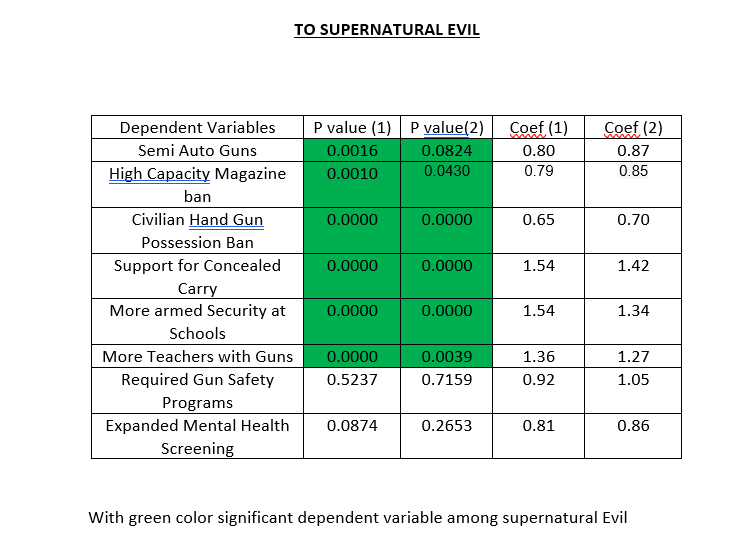

In [107]:
from IPython.display import Image
Image("download.png")

1st Semi auto weapons ban 

2st high capacity magazine ban

3st civilian hand gun possession ban 

4st support for concealed carry 

5st More armed security at schools 

6st Teachers with guns 

7st Gun safety programs

8st Expanded Mental Health screening 

In the following table we represent, with green color the significant variable values .

We can see that the AGE, Political ideology , the gender female, the state and the attendance are significant for all of the dependent variables. Also the results are similar with the Table 1 and Table 2 of the paper.

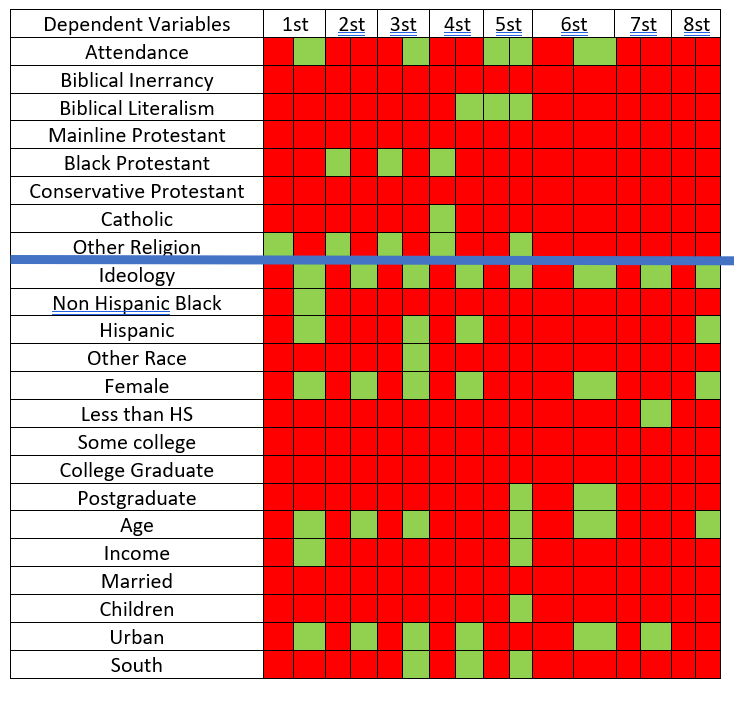

In [108]:
from IPython.display import Image
Image("download2.png")

### According to  the article of economist  "Belief in supernatural evil is a strong predictor of pro-gun beliefs", it is claimed that belief in devil, demons and hell is a strong factor to carry concealed guns. However, gender remains a significant factor in comparison with  having conservative politics or not possessing a college degree. I agree with the position of the article because in the dependent variable  support for concealed carry guns the independent variables supernatural evil, the political ideology and the gender have p value <0.0001 which means very siginificant factors to have a gun.

### Part 4: Additional Estimations of the Strength of Predictors

We will do linear regression for the all above 8 dependent variables. 
Linear Regression is a commonly used supervised Machine Learning algorithm that predicts continuous values. Linear Regression assumes that there is a linear relationship present between dependent and independent variables.
On the other hand, Logistic Regression is another supervised Machine Learning algorithm that helps fundamentally in binary classification.
We check the coefficients of linear regression and we observe that the coefficients of logistic regression are better than the linear regression, because our classification is binary.

In [109]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.formula.api as smf

# standardizing dataframe
df_z1 = dfd.apply(stats.zscore)

# fitting regression
formula = 'Ban_on_Semi_Auto_Guns~AGE+Supernatural_Evil+ATTENDANCE\
            +IDEOLOGY+INCOME+Innerancy+Biblical_Literalism\
            +MAINLINE+BLACK+CATHOLIC+OTHER\
            +FEMALE+HISPANIC\
            +OTHER_RACE+LESS+SOME_COLLEGE\
            +COLLEGE+POST_DEG+MARRIED\
            +KIDS+URBAN+SOUTH+CONSERVATIVE+BLACK_AFRICAN'
result = smf.ols(formula, data=dfd).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Ban_on_Semi_Auto_Guns   R-squared:                       0.181
Model:                               OLS   Adj. R-squared:                  0.169
Method:                    Least Squares   F-statistic:                     14.28
Date:                   Sun, 19 Dec 2021   Prob (F-statistic):           7.08e-52
Time:                           22:31:53   Log-Likelihood:                -913.91
No. Observations:                   1572   AIC:                             1878.
Df Residuals:                       1547   BIC:                             2012.
Df Model:                             24                                         
Covariance Type:               nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.0522      0.083      0.626      0.531      -0.111       0.216
AGE                     0.0041      0.001      5.442      0.000       0.003       0.006
Supernatural_Evil      -0.0217      0.014     -1.506      0.132      -0.050       0.007
ATTENDANCE              0.0110      0.005      2.135      0.033       0.001       0.021
IDEOLOGY                0.0653      0.008      8.521      0.000       0.050       0.080
INCOME                  0.0188      0.008      2.290      0.022       0.003       0.035
Innerancy              -0.0300      0.031     -0.958      0.338      -0.091       0.031
Biblical_Literalism    -0.0131      0.039     -0.339      0.734      -0.089       0.063
MAINLINE                0.0238      0.042      0.570      0.569      -0.058       0.106
BLACK                  -0.0506      0.071     -0.710      0.478      -0.190       0.089
CATHOLIC                0.0359      0.040      0.891      0.373      -0.043       0.115
OTHER                   0.0813      0.050      1.626      0.104      -0.017       0.179
FEMALE                  0.2344      0.023     10.136      0.000       0.189       0.280
HISPANIC                0.0829      0.041      2.033      0.042       0.003       0.163
OTHER_RACE              0.0269      0.064      0.418      0.676      -0.100       0.153
LESS                   -0.0662      0.054     -1.216      0.224      -0.173       0.041
SOME_COLLEGE           -0.0633      0.034     -1.867      0.062      -0.130       0.003
COLLEGE                -0.1023      0.037     -2.795      0.005      -0.174      -0.031
POST_DEG               -0.0021      0.040     -0.053      0.958      -0.080       0.075
MARRIED                -0.0518      0.025     -2.053      0.040      -0.101      -0.002
KIDS                   -0.0087      0.014     -0.635      0.526      -0.036       0.018
URBAN                   0.0533      0.023      2.321      0.020       0.008       0.098
SOUTH                  -0.0661      0.024     -2.806      0.005      -0.112      -0.020
CONSERVATIVE            0.0153      0.044      0.349      0.727      -0.071       0.101
BLACK_AFRICAN           0.1373      0.052      2.653      0.008       0.036       0.239
==============================================================================
Omnibus:                      719.167   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.094
Skew:                          -0.430   Prob(JB):                     5.63e-29
Kurtosis:                       1.883   Cond. No.                         461.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
# standardizing dataframe
df_z1 = dfd.apply(stats.zscore)

# fitting regression
formula = 'Ban_on_High_Capacity_Ammo_Clips~AGE+Supernatural_Evil+ATTENDANCE\
            +IDEOLOGY+INCOME+Innerancy+Biblical_Literalism\
            +MAINLINE+BLACK+CATHOLIC+OTHER\
            +FEMALE+HISPANIC\
            +OTHER_RACE+LESS+SOME_COLLEGE\
            +COLLEGE+POST_DEG+MARRIED\
            +KIDS+URBAN+SOUTH+CONSERVATIVE+BLACK_AFRICAN'
result = smf.ols(formula, data=dfd).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Ban_on_High_Capacity_Ammo_Clips   R-squared:                       0.153
Model:                                         OLS   Adj. R-squared:                  0.139
Method:                              Least Squares   F-statistic:                     11.61
Date:                             Sun, 19 Dec 2021   Prob (F-statistic):           4.30e-41
Time:                                     22:31:53   Log-Likelihood:                -894.05
No. Observations:                             1572   AIC:                             1838.
Df Residuals:                                 1547   BIC:                             1972.
Df Model:                                       24                                         
Covariance Type:                         nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.1838      0.082      2.235      0.026       0.022       0.345
AGE                     0.0047      0.001      6.331      0.000       0.003       0.006
Supernatural_Evil      -0.0267      0.014     -1.874      0.061      -0.055       0.001
ATTENDANCE              0.0091      0.005      1.789      0.074      -0.001       0.019
IDEOLOGY                0.0572      0.008      7.561      0.000       0.042       0.072
INCOME                  0.0025      0.008      0.304      0.761      -0.013       0.018
Innerancy              -0.0220      0.031     -0.713      0.476      -0.083       0.039
Biblical_Literalism    -0.0392      0.038     -1.031      0.303      -0.114       0.035
MAINLINE                0.0206      0.041      0.500      0.617      -0.060       0.101
BLACK                   0.0070      0.070      0.100      0.920      -0.131       0.145
CATHOLIC                0.0320      0.040      0.804      0.421      -0.046       0.110
OTHER                   0.0695      0.049      1.408      0.159      -0.027       0.166
FEMALE                  0.1975      0.023      8.651      0.000       0.153       0.242
HISPANIC                0.0564      0.040      1.400      0.162      -0.023       0.135
OTHER_RACE              0.0365      0.064      0.574      0.566      -0.088       0.161
LESS                   -0.0109      0.054     -0.203      0.839      -0.116       0.095
SOME_COLLEGE           -0.0886      0.033     -2.645      0.008      -0.154      -0.023
COLLEGE                -0.1049      0.036     -2.901      0.004      -0.176      -0.034
POST_DEG               -0.0116      0.039     -0.297      0.766      -0.088       0.065
MARRIED                -0.0051      0.025     -0.203      0.839      -0.054       0.044
KIDS                   -0.0232      0.014     -1.719      0.086      -0.050       0.003
URBAN                   0.0456      0.023      2.013      0.044       0.001       0.090
SOUTH                  -0.0202      0.023     -0.870      0.385      -0.066       0.025
CONSERVATIVE            0.0245      0.043      0.567      0.571      -0.060       0.109
BLACK_AFRICAN           0.0868      0.051      1.698      0.090      -0.013       0.187
==============================================================================
Omnibus:                      385.067   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.087
Skew:                          -0.634   Prob(JB):                     5.22e-37
Kurtosis:                       2.030   Cond. No.                         461.
==============================================================================

N

In [111]:
# standardizing dataframe
df_z1 = dfd.apply(stats.zscore)

# fitting regression
formula = 'Banning_Civilian_Handguns~AGE+Supernatural_Evil+ATTENDANCE\
            +IDEOLOGY+INCOME+Innerancy+Biblical_Literalism\
            +MAINLINE+BLACK+CATHOLIC+OTHER\
            +FEMALE+HISPANIC\
            +OTHER_RACE+LESS+SOME_COLLEGE\
            +COLLEGE+POST_DEG+MARRIED\
            +KIDS+URBAN+SOUTH+CONSERVATIVE+BLACK_AFRICAN'
result = smf.ols(formula, data=dfd).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Banning_Civilian_Handguns   R-squared:                       0.125
Model:                                   OLS   Adj. R-squared:                  0.111
Method:                        Least Squares   F-statistic:                     9.185
Date:                       Sun, 19 Dec 2021   Prob (F-statistic):           3.62e-31
Time:                               22:31:53   Log-Likelihood:                -862.53
No. Observations:                       1572   AIC:                             1775.
Df Residuals:                           1547   BIC:                             1909.
Df Model:                                 24                                         
Covariance Type:                   nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.1328      0.081      1.647      0.100      -0.025       0.291
AGE                     0.0017      0.001      2.284      0.023       0.000       0.003
Supernatural_Evil      -0.0670      0.014     -4.796      0.000      -0.094      -0.040
ATTENDANCE              0.0112      0.005      2.246      0.025       0.001       0.021
IDEOLOGY                0.0460      0.007      6.192      0.000       0.031       0.061
INCOME                 -0.0094      0.008     -1.191      0.234      -0.025       0.006
Innerancy              -0.0088      0.030     -0.291      0.771      -0.068       0.051
Biblical_Literalism     0.0501      0.037      1.342      0.180      -0.023       0.123
MAINLINE               -0.0190      0.040     -0.472      0.637      -0.098       0.060
BLACK                   0.1708      0.069      2.476      0.013       0.035       0.306
CATHOLIC                0.0535      0.039      1.374      0.169      -0.023       0.130
OTHER                   0.0916      0.048      1.892      0.059      -0.003       0.186
FEMALE                  0.0575      0.022      2.570      0.010       0.014       0.101
HISPANIC                0.1179      0.039      2.988      0.003       0.041       0.195
OTHER_RACE              0.1583      0.062      2.538      0.011       0.036       0.281
LESS                    0.0401      0.053      0.760      0.447      -0.063       0.143
SOME_COLLEGE           -0.0692      0.033     -2.110      0.035      -0.134      -0.005
COLLEGE                -0.0309      0.035     -0.872      0.383      -0.100       0.039
POST_DEG                0.0285      0.038      0.745      0.457      -0.047       0.103
MARRIED                 0.0094      0.024      0.386      0.700      -0.039       0.057
KIDS                    0.0045      0.013      0.343      0.732      -0.021       0.030
URBAN                   0.0584      0.022      2.630      0.009       0.015       0.102
SOUTH                  -0.0406      0.023     -1.779      0.076      -0.085       0.004
CONSERVATIVE            0.0086      0.042      0.203      0.839      -0.074       0.092
BLACK_AFRICAN           0.0452      0.050      0.903      0.367      -0.053       0.143
==============================================================================
Omnibus:                      249.714   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.758
Skew:                           0.788   Prob(JB):                     9.37e-45
Kurtosis:                       2.216   Cond. No.                         461.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the

In [112]:
# standardizing dataframe
df_z1 = dfd.apply(stats.zscore)

# fitting regression
formula = 'Support_for_Concealed_Carry_Laws~AGE+Supernatural_Evil+ATTENDANCE\
            +IDEOLOGY+INCOME+Innerancy+Biblical_Literalism\
            +MAINLINE+BLACK+CATHOLIC+OTHER\
            +FEMALE+HISPANIC\
            +OTHER_RACE+LESS+SOME_COLLEGE\
            +COLLEGE+POST_DEG+MARRIED\
            +KIDS+URBAN+SOUTH+CONSERVATIVE+BLACK_AFRICAN'
result = smf.ols(formula, data=dfd).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Support_for_Concealed_Carry_Laws   R-squared:                       0.156
Model:                                          OLS   Adj. R-squared:                  0.143
Method:                               Least Squares   F-statistic:                     11.88
Date:                              Sun, 19 Dec 2021   Prob (F-statistic):           3.37e-42
Time:                                      22:31:54   Log-Likelihood:                -988.81
No. Observations:                              1572   AIC:                             2028.
Df Residuals:                                  1547   BIC:                             2162.
Df Model:                                        24                                         
Covariance Type:                          nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.8703      0.087      9.960      0.000       0.699       1.042
AGE                    -0.0011      0.001     -1.333      0.183      -0.003       0.000
Supernatural_Evil       0.0744      0.015      4.915      0.000       0.045       0.104
ATTENDANCE             -0.0048      0.005     -0.884      0.377      -0.015       0.006
IDEOLOGY               -0.0642      0.008     -7.984      0.000      -0.080      -0.048
INCOME                 -0.0098      0.009     -1.139      0.255      -0.027       0.007
Innerancy              -0.0843      0.033     -2.570      0.010      -0.149      -0.020
Biblical_Literalism    -0.0476      0.040     -1.177      0.239      -0.127       0.032
MAINLINE                0.0018      0.044      0.040      0.968      -0.084       0.087
BLACK                  -0.1499      0.075     -2.007      0.045      -0.297      -0.003
CATHOLIC               -0.0835      0.042     -1.977      0.048      -0.166      -0.001
OTHER                  -0.0625      0.052     -1.191      0.234      -0.165       0.040
FEMALE                 -0.1524      0.024     -6.285      0.000      -0.200      -0.105
HISPANIC               -0.0442      0.043     -1.034      0.301      -0.128       0.040
OTHER_RACE             -0.1112      0.068     -1.644      0.100      -0.244       0.021
LESS                   -0.0586      0.057     -1.026      0.305      -0.171       0.053
SOME_COLLEGE            0.0441      0.036      1.240      0.215      -0.026       0.114
COLLEGE                 0.0373      0.038      0.970      0.332      -0.038       0.113
POST_DEG               -0.0682      0.041     -1.647      0.100      -0.150       0.013
MARRIED                 0.0097      0.026      0.365      0.715      -0.042       0.062
KIDS                   -0.0064      0.014     -0.443      0.658      -0.034       0.022
URBAN                  -0.0648      0.024     -2.691      0.007      -0.112      -0.018
SOUTH                   0.0746      0.025      3.019      0.003       0.026       0.123
CONSERVATIVE           -0.0230      0.046     -0.500      0.617      -0.113       0.067
BLACK_AFRICAN          -0.0346      0.054     -0.638      0.524      -0.141       0.072
==============================================================================
Omnibus:                    12784.470   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.388
Skew:                          -0.247   Prob(JB):                     1.08e-29
Kurtosis:                       1.661   Cond. No.                         461.
======================================================================

In [113]:
# standardizing dataframe
df_z1 = dfd.apply(stats.zscore)

# fitting regression
formula = 'More_Armed_Security_at_Schools~AGE+Supernatural_Evil+ATTENDANCE\
            +IDEOLOGY+INCOME+Innerancy+Biblical_Literalism\
            +MAINLINE+BLACK+CATHOLIC+OTHER\
            +FEMALE+HISPANIC\
            +OTHER_RACE+LESS+SOME_COLLEGE\
            +COLLEGE+POST_DEG+MARRIED\
            +KIDS+URBAN+SOUTH+CONSERVATIVE+BLACK_AFRICAN'
result = smf.ols(formula, data=dfd).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     More_Armed_Security_at_Schools   R-squared:                       0.134
Model:                                        OLS   Adj. R-squared:                  0.121
Method:                             Least Squares   F-statistic:                     9.992
Date:                            Sun, 19 Dec 2021   Prob (F-statistic):           1.76e-34
Time:                                    22:31:54   Log-Likelihood:                -966.55
No. Observations:                            1572   AIC:                             1983.
Df Residuals:                                1547   BIC:                             2117.
Df Model:                                      24                                         
Covariance Type:                        nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.7726      0.086      8.969      0.000       0.604       0.942
AGE                    -0.0015      0.001     -1.976      0.048      -0.003   -1.15e-05
Supernatural_Evil       0.0676      0.015      4.530      0.000       0.038       0.097
ATTENDANCE             -0.0148      0.005     -2.776      0.006      -0.025      -0.004
IDEOLOGY               -0.0380      0.008     -4.788      0.000      -0.054      -0.022
INCOME                 -0.0226      0.008     -2.666      0.008      -0.039      -0.006
Innerancy               0.0197      0.032      0.609      0.542      -0.044       0.083
Biblical_Literalism     0.0802      0.040      2.013      0.044       0.002       0.158
MAINLINE                0.0758      0.043      1.760      0.079      -0.009       0.160
BLACK                   0.0717      0.074      0.973      0.331      -0.073       0.216
CATHOLIC                0.0578      0.042      1.389      0.165      -0.024       0.139
OTHER                   0.0950      0.052      1.837      0.066      -0.006       0.196
FEMALE                 -0.0001      0.024     -0.006      0.995      -0.047       0.047
HISPANIC                0.0258      0.042      0.611      0.541      -0.057       0.108
OTHER_RACE             -0.0159      0.067     -0.238      0.812      -0.147       0.115
LESS                   -0.0943      0.056     -1.675      0.094      -0.205       0.016
SOME_COLLEGE           -0.0770      0.035     -2.195      0.028      -0.146      -0.008
COLLEGE                -0.0843      0.038     -2.228      0.026      -0.159      -0.010
POST_DEG               -0.1915      0.041     -4.687      0.000      -0.272      -0.111
MARRIED                 0.0470      0.026      1.800      0.072      -0.004       0.098
KIDS                   -0.0063      0.014     -0.447      0.655      -0.034       0.021
URBAN                  -0.0453      0.024     -1.910      0.056      -0.092       0.001
SOUTH                   0.0816      0.024      3.347      0.001       0.034       0.129
CONSERVATIVE            0.0417      0.045      0.921      0.357      -0.047       0.130
BLACK_AFRICAN           0.0534      0.054      0.999      0.318      -0.052       0.158
==============================================================================
Omnibus:                     1185.090   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.082
Skew:                          -0.500   Prob(JB):                     4.71e-35
Kurtosis:                       1.811   Cond. No.                         461.
==============================================================================

Notes:
[1] S

In [114]:
# standardizing dataframe
df_z1 = dfd.apply(stats.zscore)

# fitting regression
formula = 'More_Teachers_Faculty_having_Guns~AGE+Supernatural_Evil+ATTENDANCE\
            +IDEOLOGY+INCOME+Innerancy+Biblical_Literalism\
            +MAINLINE+BLACK+CATHOLIC+OTHER\
            +FEMALE+HISPANIC\
            +OTHER_RACE+LESS+SOME_COLLEGE\
            +COLLEGE+POST_DEG+MARRIED\
            +KIDS+URBAN+SOUTH+CONSERVATIVE+BLACK_AFRICAN'
result = smf.ols(formula, data=dfd).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     More_Teachers_Faculty_having_Guns   R-squared:                       0.110
Model:                                           OLS   Adj. R-squared:                  0.097
Method:                                Least Squares   F-statistic:                     7.992
Date:                               Sun, 19 Dec 2021   Prob (F-statistic):           2.91e-26
Time:                                       22:31:54   Log-Likelihood:                -883.02
No. Observations:                               1572   AIC:                             1816.
Df Residuals:                                   1547   BIC:                             1950.
Df Model:                                         24                                         
Covariance Type:                           nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.5744      0.082      7.032      0.000       0.414       0.735
AGE                    -0.0017      0.001     -2.337      0.020      -0.003      -0.000
Supernatural_Evil       0.0399      0.014      2.820      0.005       0.012       0.068
ATTENDANCE             -0.0134      0.005     -2.656      0.008      -0.023      -0.004
IDEOLOGY               -0.0466      0.008     -6.202      0.000      -0.061      -0.032
INCOME                 -0.0069      0.008     -0.859      0.391      -0.023       0.009
Innerancy               0.0006      0.031      0.021      0.984      -0.060       0.061
Biblical_Literalism    -0.0055      0.038     -0.147      0.884      -0.080       0.069
MAINLINE                0.0028      0.041      0.069      0.945      -0.077       0.083
BLACK                   0.0574      0.070      0.822      0.411      -0.080       0.194
CATHOLIC               -0.0268      0.039     -0.678      0.498      -0.104       0.051
OTHER                  -0.0154      0.049     -0.315      0.753      -0.112       0.081
FEMALE                 -0.1238      0.023     -5.459      0.000      -0.168      -0.079
HISPANIC               -0.0854      0.040     -2.136      0.033      -0.164      -0.007
OTHER_RACE              0.0846      0.063      1.338      0.181      -0.039       0.209
LESS                   -0.0232      0.053     -0.435      0.664      -0.128       0.082
SOME_COLLEGE            0.0320      0.033      0.962      0.336      -0.033       0.097
COLLEGE                 0.0333      0.036      0.928      0.354      -0.037       0.104
POST_DEG               -0.0270      0.039     -0.696      0.486      -0.103       0.049
MARRIED                 0.0436      0.025      1.762      0.078      -0.005       0.092
KIDS                    0.0213      0.013      1.586      0.113      -0.005       0.048
URBAN                  -0.0686      0.023     -3.048      0.002      -0.113      -0.024
SOUTH                  -0.0180      0.023     -0.780      0.436      -0.063       0.027
CONSERVATIVE            0.0591      0.043      1.378      0.168      -0.025       0.143
BLACK_AFRICAN          -0.1253      0.051     -2.470      0.014      -0.225      -0.026
==============================================================================
Omnibus:                      320.859   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.482
Skew:                           0.785   Prob(JB):                     7.25e-47
Kurtosis:                       2.117   Cond. No.                         461.
===========================================================

In [115]:
# standardizing dataframe
df_z1 = dfd.apply(stats.zscore)

# fitting regression
formula = 'More_Gun_Safety_Programs~AGE+Supernatural_Evil+ATTENDANCE\
            +IDEOLOGY+INCOME+Innerancy+Biblical_Literalism\
            +MAINLINE+BLACK+CATHOLIC+OTHER\
            +FEMALE+HISPANIC\
            +OTHER_RACE+LESS+SOME_COLLEGE\
            +COLLEGE+POST_DEG+MARRIED\
            +KIDS+URBAN+SOUTH+CONSERVATIVE+BLACK_AFRICAN'
result = smf.ols(formula, data=dfd).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     More_Gun_Safety_Programs   R-squared:                       0.039
Model:                                  OLS   Adj. R-squared:                  0.024
Method:                       Least Squares   F-statistic:                     2.589
Date:                      Sun, 19 Dec 2021   Prob (F-statistic):           4.10e-05
Time:                              22:31:54   Log-Likelihood:                -52.133
No. Observations:                      1572   AIC:                             154.3
Df Residuals:                          1547   BIC:                             288.3
Df Model:                                24                                         
Covariance Type:                  nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.8059      0.048     16.736      0.000       0.711       0.900
AGE                     0.0006      0.000      1.360      0.174      -0.000       0.001
Supernatural_Evil       0.0030      0.008      0.361      0.718      -0.013       0.019
ATTENDANCE             -0.0030      0.003     -1.020      0.308      -0.009       0.003
IDEOLOGY                0.0154      0.004      3.486      0.001       0.007       0.024
INCOME                  0.0008      0.005      0.177      0.860      -0.008       0.010
Innerancy               0.0033      0.018      0.185      0.853      -0.032       0.039
Biblical_Literalism    -0.0045      0.022     -0.201      0.841      -0.048       0.039
MAINLINE                0.0218      0.024      0.903      0.366      -0.025       0.069
BLACK                  -0.0267      0.041     -0.649      0.517      -0.107       0.054
CATHOLIC                0.0271      0.023      1.165      0.244      -0.019       0.073
OTHER                   0.0144      0.029      0.497      0.619      -0.042       0.071
FEMALE                  0.0357      0.013      2.673      0.008       0.010       0.062
HISPANIC                0.0356      0.024      1.508      0.132      -0.011       0.082
OTHER_RACE             -0.0206      0.037     -0.553      0.581      -0.094       0.052
LESS                   -0.0846      0.031     -2.687      0.007      -0.146      -0.023
SOME_COLLEGE           -0.0177      0.020     -0.902      0.367      -0.056       0.021
COLLEGE                -0.0231      0.021     -1.093      0.275      -0.065       0.018
POST_DEG               -0.0017      0.023     -0.074      0.941      -0.046       0.043
MARRIED                 0.0113      0.015      0.773      0.440      -0.017       0.040
KIDS                   -0.0212      0.008     -2.683      0.007      -0.037      -0.006
URBAN                   0.0292      0.013      2.202      0.028       0.003       0.055
SOUTH                  -0.0178      0.014     -1.310      0.191      -0.045       0.009
CONSERVATIVE            0.0289      0.025      1.141      0.254      -0.021       0.078
BLACK_AFRICAN           0.0453      0.030      1.515      0.130      -0.013       0.104
==============================================================================
Omnibus:                     1020.659   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7520.408
Skew:                          -3.172   Prob(JB):                         0.00
Kurtosis:                      11.635   Cond. No.                         461.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is 

In [116]:

# standardizing dataframe
df_z1 = dfd.apply(stats.zscore)

# fitting regression
formula = 'Expanded_Mental_Health_Screening~AGE+Supernatural_Evil+ATTENDANCE\
            +IDEOLOGY+INCOME+Innerancy+Biblical_Literalism\
            +MAINLINE+BLACK+CATHOLIC+OTHER\
            +FEMALE+HISPANIC\
            +OTHER_RACE+LESS+SOME_COLLEGE\
            +COLLEGE+POST_DEG+MARRIED\
            +KIDS+URBAN+SOUTH+CONSERVATIVE+BLACK_AFRICAN'
result = smf.ols(formula, data=dfd).fit()

# checking results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Expanded_Mental_Health_Screening   R-squared:                       0.055
Model:                                          OLS   Adj. R-squared:                  0.040
Method:                               Least Squares   F-statistic:                     3.735
Date:                              Sun, 19 Dec 2021   Prob (F-statistic):           3.38e-09
Time:                                      22:31:54   Log-Likelihood:                -206.99
No. Observations:                              1572   AIC:                             464.0
Df Residuals:                                  1547   BIC:                             598.0
Df Model:                                        24                                         
Covariance Type:                          nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.8137      0.053     15.312      0.000       0.709       0.918
AGE                     0.0006      0.000      1.275      0.202      -0.000       0.002
Supernatural_Evil      -0.0094      0.009     -1.026      0.305      -0.028       0.009
ATTENDANCE              0.0021      0.003      0.641      0.522      -0.004       0.009
IDEOLOGY                0.0179      0.005      3.653      0.000       0.008       0.027
INCOME               1.238e-05      0.005      0.002      0.998      -0.010       0.010
Innerancy               0.0030      0.020      0.148      0.882      -0.036       0.042
Biblical_Literalism    -0.0150      0.025     -0.608      0.543      -0.063       0.033
MAINLINE                0.0220      0.027      0.827      0.409      -0.030       0.074
BLACK                  -0.0167      0.045     -0.368      0.713      -0.106       0.072
CATHOLIC                0.0224      0.026      0.874      0.382      -0.028       0.073
OTHER                   0.0230      0.032      0.723      0.470      -0.040       0.086
FEMALE                  0.0585      0.015      3.966      0.000       0.030       0.087
HISPANIC                0.0759      0.026      2.916      0.004       0.025       0.127
OTHER_RACE             -0.0504      0.041     -1.226      0.221      -0.131       0.030
LESS                   -0.0384      0.035     -1.106      0.269      -0.107       0.030
SOME_COLLEGE           -0.0487      0.022     -2.253      0.024      -0.091      -0.006
COLLEGE                -0.0540      0.023     -2.312      0.021      -0.100      -0.008
POST_DEG               -0.0299      0.025     -1.186      0.236      -0.079       0.020
MARRIED                 0.0073      0.016      0.454      0.650      -0.024       0.039
KIDS                   -0.0185      0.009     -2.124      0.034      -0.036      -0.001
URBAN                   0.0265      0.015      1.813      0.070      -0.002       0.055
SOUTH                   0.0076      0.015      0.508      0.612      -0.022       0.037
CONSERVATIVE           -0.0229      0.028     -0.820      0.413      -0.078       0.032
BLACK_AFRICAN           0.0512      0.033      1.550      0.121      -0.014       0.116
==============================================================================
Omnibus:                      840.085   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4017.345
Skew:                          -2.666   Prob(JB):                         0.00
Kurtosis:                       8.735   Cond. No.                         461.
======================================================================